# Dataset 1: Student Mental Health

# Import Neccessary Libraries

In [1]:
# !pip install matplotlib_venn
# !pip install keras_tuner
# !pip install catboost
# !pip install keras  --upgrade

In [2]:
import pandas as pd
from pprint import pprint
from sharedFunctions import *
from models import *

# Import Dataset

In [3]:
df = pd.read_csv('dataset\Student Mental health.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
df.head()

Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes                        No   
2                     Yes                  Yes                       Yes   
3                     Yes                   No                        No   
4                      No                   No                        No   

  Did you seek any specialist for a treatment?  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No

# Handling Missing Values

In [5]:
# Drop unnecessary column
df = df.drop(['Timestamp'], axis=1)

# Fill missing values in 'Age' column with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# For visualization Purpose
df_origin = df.copy()

In [6]:
print_unique_values_for_object_columns(df)

df['Your current year of Study'].unique()

Choose your gender : ['Female' 'Male']
What is your course? : ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Your current year of Study : ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
What is your CGPA? : ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Marital status : ['No' 'Yes']
Do you have Depression? : ['Yes' 'No']
Do you have Anxiety? : ['No' 'Yes']
Do you have Panic attack? : ['Yes' 'No']
Did

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [7]:
df.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [8]:
string_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

# Encoding

In [9]:
label_encode_columns = ["Choose your gender", "What is your course?", "What is your CGPA?"]

# Call encoding function
df = encode_objectdtypes_columns(df, label_encode_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    int32  
 1   Age                                           101 non-null    float64
 2   What is your course?                          101 non-null    int32  
 3   Your current year of Study                    101 non-null    int64  
 4   What is your CGPA?                            101 non-null    int32  
 5   Marital status                                101 non-null    int64  
 6   Do you have Depression?                       101 non-null    int64  
 7   Do you have Anxiety?                          101 non-null    int64  
 8   Do you have Panic attack?                     101 non-null    int64  
 9   Did you seek any specialist for a treatment?  101 non-null    int

In [10]:
for column in string_columns:
    print(f"Value counts for the column '{column}':")
    print(df[column].value_counts(), "\n")

Value counts for the column 'Choose your gender':
Choose your gender
0    75
1    26
Name: count, dtype: int64 

Value counts for the column 'What is your course?':
What is your course?
2     18
17    17
4     10
7      4
28     4
3      2
33     2
48     2
16     2
24     1
8      1
46     1
15     1
34     1
35     1
31     1
21     1
11     1
38     1
13     1
22     1
40     1
43     1
19     1
12     1
30     1
18     1
10     1
47     1
6      1
29     1
37     1
41     1
20     1
23     1
42     1
26     1
1      1
14     1
36     1
5      1
9      1
32     1
27     1
45     1
44     1
0      1
25     1
39     1
Name: count, dtype: int64 

Value counts for the column 'Your current year of Study':
Your current year of Study
1    43
2    26
3    24
4     8
Name: count, dtype: int64 

Value counts for the column 'What is your CGPA?':
What is your CGPA?
4    47
3    43
2     4
0     4
1     2
5     1
Name: count, dtype: int64 

Value counts for the column 'Marital status':
Marital s

In [11]:
df.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [12]:
# Rename columns
df = df.rename(columns={'Choose your gender': 'gender',
                        'Age': 'age',
                        'What is your course?': 'course',
                        'Your current year of Study': 'current_year_of_study',
                        'What is your CGPA?': 'cgpa',
                        'Marital status': 'marital_status',
                        'Do you have Depression?': 'depression',
                        'Do you have Anxiety?': 'anxiety',
                        'Do you have Panic attack?': 'panic_attack',
                        'Did you seek any specialist for a treatment?': 'treatment'})
df.head()

gender   age  course  current_year_of_study  cgpa  marital_status  \
0       0  18.0      17                      1     3               0   
1       1  21.0      25                      2     3               0   
2       1  19.0       4                      1     3               0   
3       0  22.0      33                      3     3               1   
4       1  23.0      37                      4     3               0   

   depression  anxiety  panic_attack  treatment  
0           1        0             1          0  
1           0        1             0          0  
2           1        1             1          0  
3           1        0             0          0  
4           0        0             0          0

In [13]:
df.describe()

gender         age      course  current_year_of_study        cgpa  \
count  101.000000  101.000000  101.000000             101.000000  101.000000   
mean     0.257426   20.530000   17.059406               1.970297    3.287129   
std      0.439397    2.483767   14.008442               0.994540    0.952225   
min      0.000000   18.000000    0.000000               1.000000    0.000000   
25%      0.000000   18.000000    4.000000               1.000000    3.000000   
50%      0.000000   19.000000   17.000000               2.000000    3.000000   
75%      1.000000   23.000000   28.000000               3.000000    4.000000   
max      1.000000   24.000000   48.000000               4.000000    5.000000   

       marital_status  depression     anxiety  panic_attack   treatment  
count      101.000000  101.000000  101.000000    101.000000  101.000000  
mean         0.158416    0.346535    0.336634      0.326733    0.059406  
std          0.366952    0.478239    0.474915      0.471358    0.237562  
min          0.000000    0.000000    0.000000      0.000000    0.000000  
25%          0.000000    0.000000    0.000000      0.000000    0.000000  
50%          0.000000    0.000000    0.000000      0.000000    0.000000  
75%          0.000000    1.000000    1.000000      1.000000    0.000000  
max          1.000000    1.000000    1.000000      1.000000    1.000000

In [14]:
df.current_year_of_study.unique()

array([1, 2, 3, 4], dtype=int64)

# Data Exploration

Study year and Gender

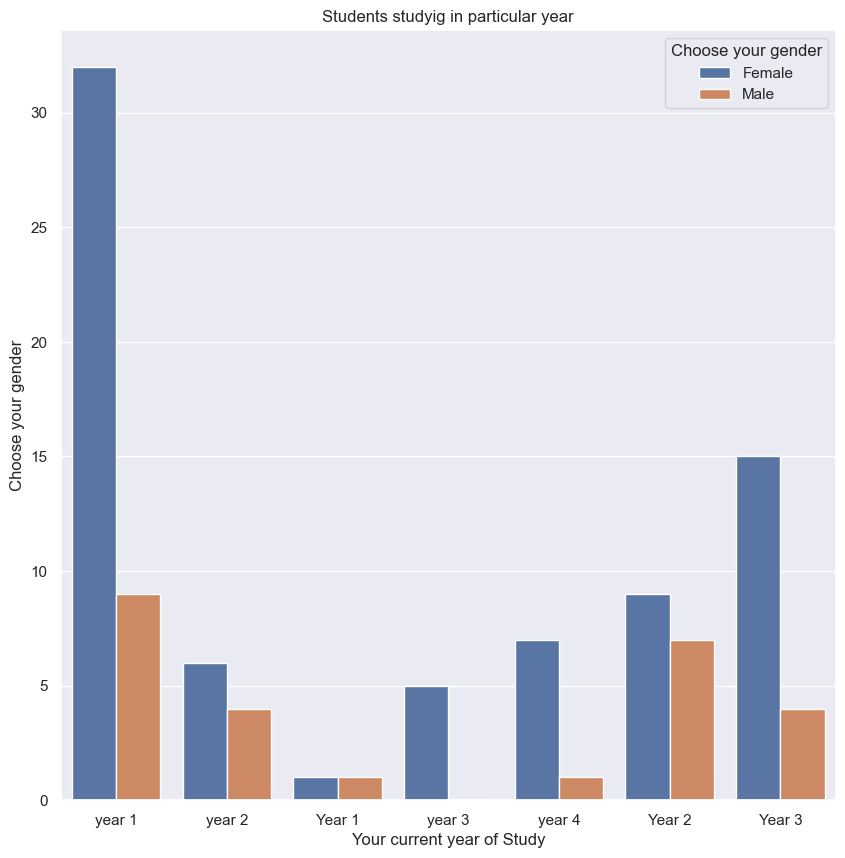

In [15]:
# Usage, df, x, hue, title
plot_comparison_student(df_origin, 'Your current year of Study', 'Choose your gender', 'Students studyig in particular year')

CGPA and Gender

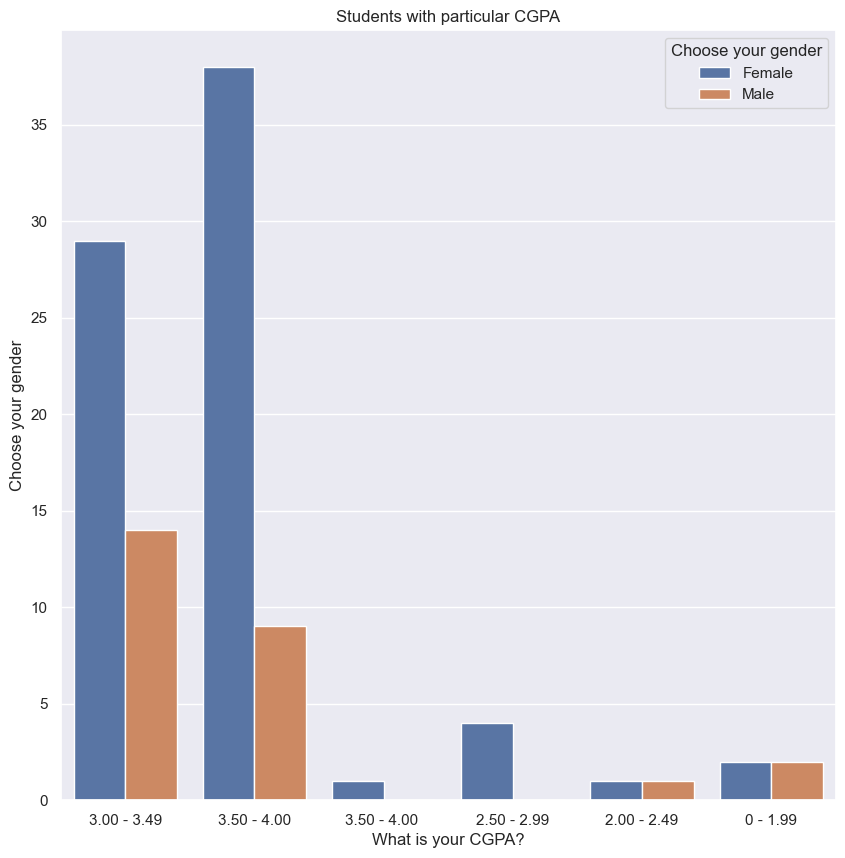

In [16]:
plot_comparison_student(df_origin, 'What is your CGPA?', 'Choose your gender', 'Students with particular CGPA')

Depression and CGPA

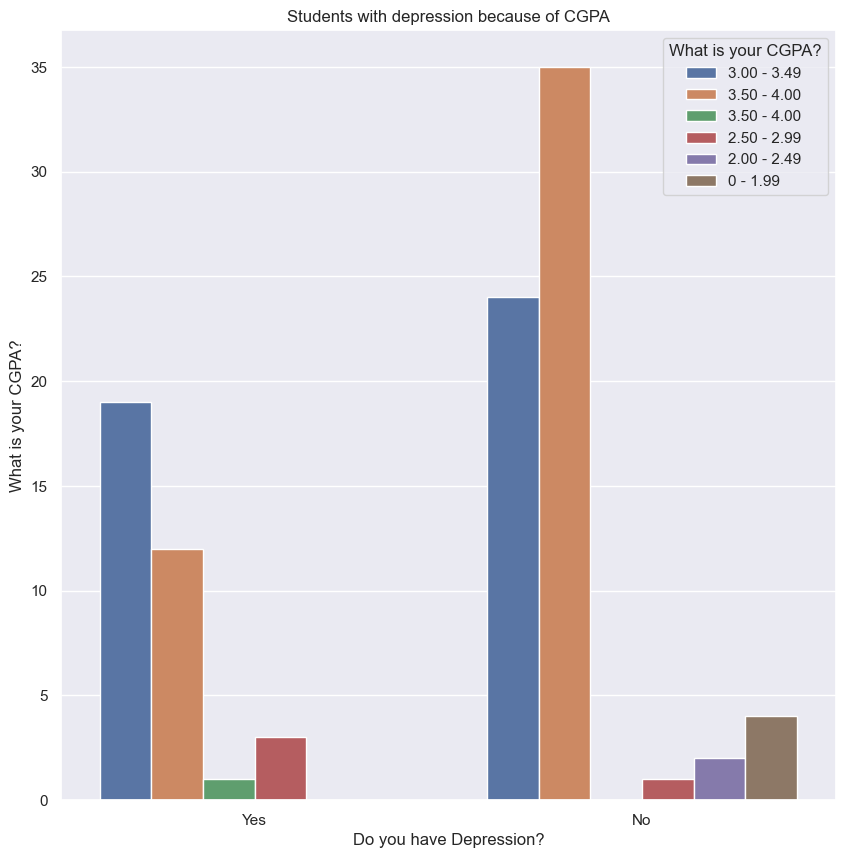

In [17]:
plot_comparison_student(df_origin, 'Do you have Depression?', 'What is your CGPA?', 'Students with depression because of CGPA')

Panic Attack and CGPA

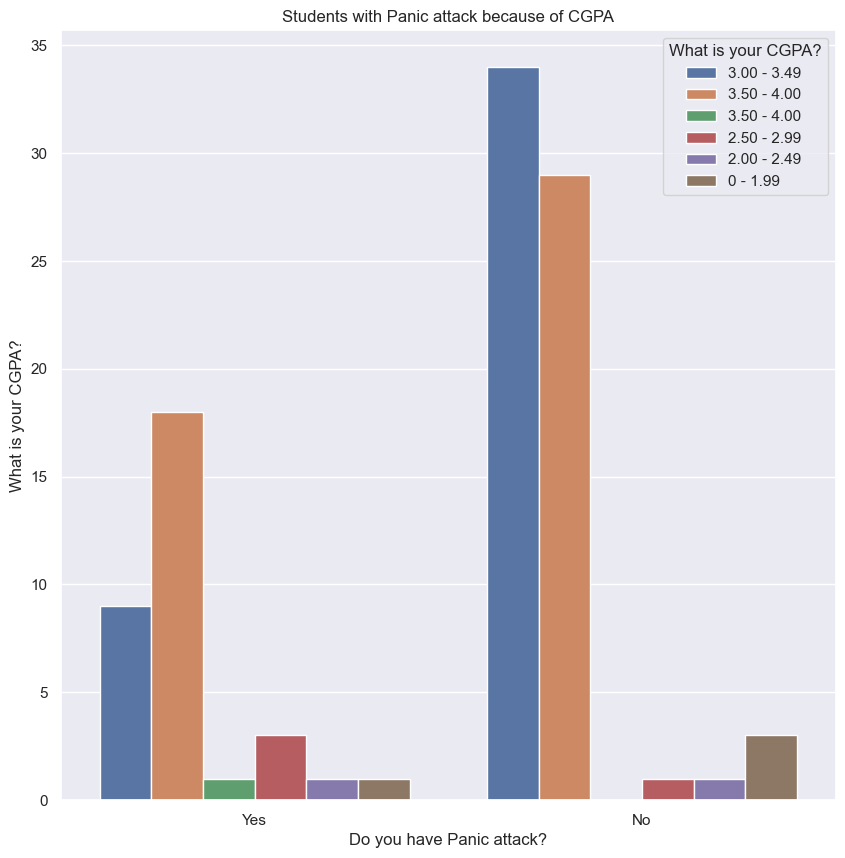

In [18]:
plot_comparison_student(df_origin, 'Do you have Panic attack?', 'What is your CGPA?', 'Students with Panic attack because of CGPA')

Course vs Depression

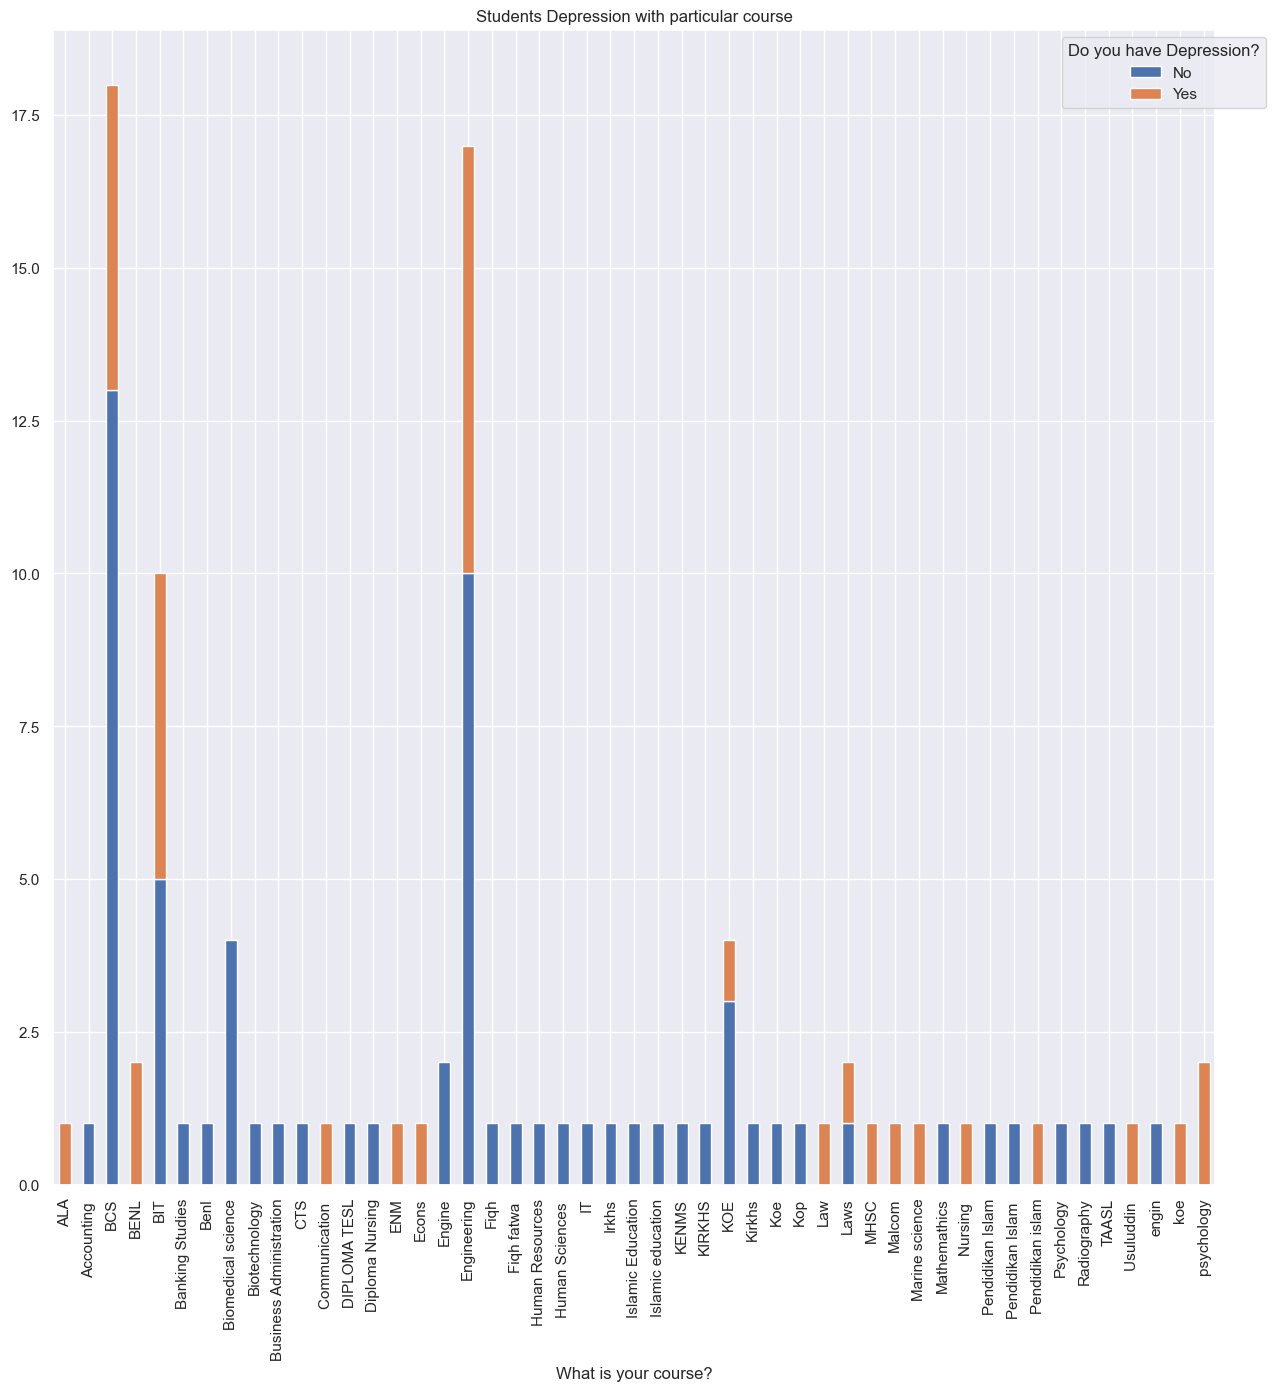

In [19]:
plot_stacking_bars(df_origin, 'What is your course?', 'Do you have Depression?', 'Students Depression with particular course')

Course vs Anxiety

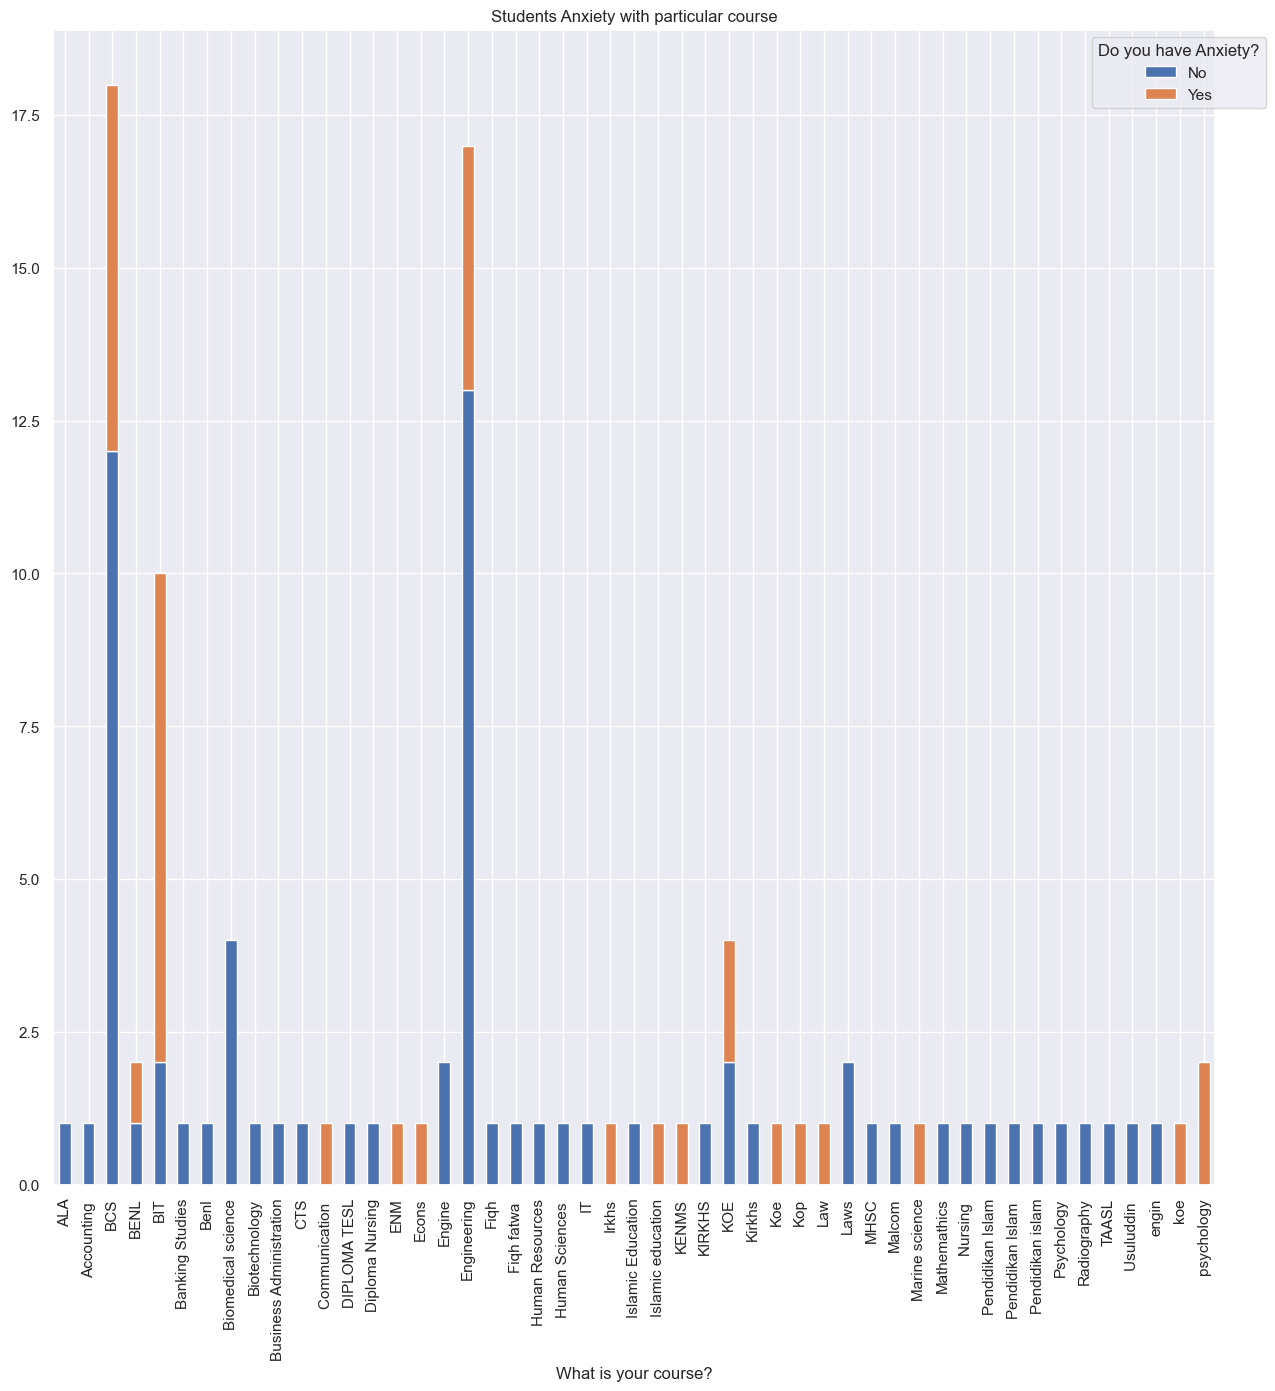

In [20]:
plot_stacking_bars(df_origin, 'What is your course?', 'Do you have Anxiety?', 'Students Anxiety with particular course')

Course vs Panic Attack

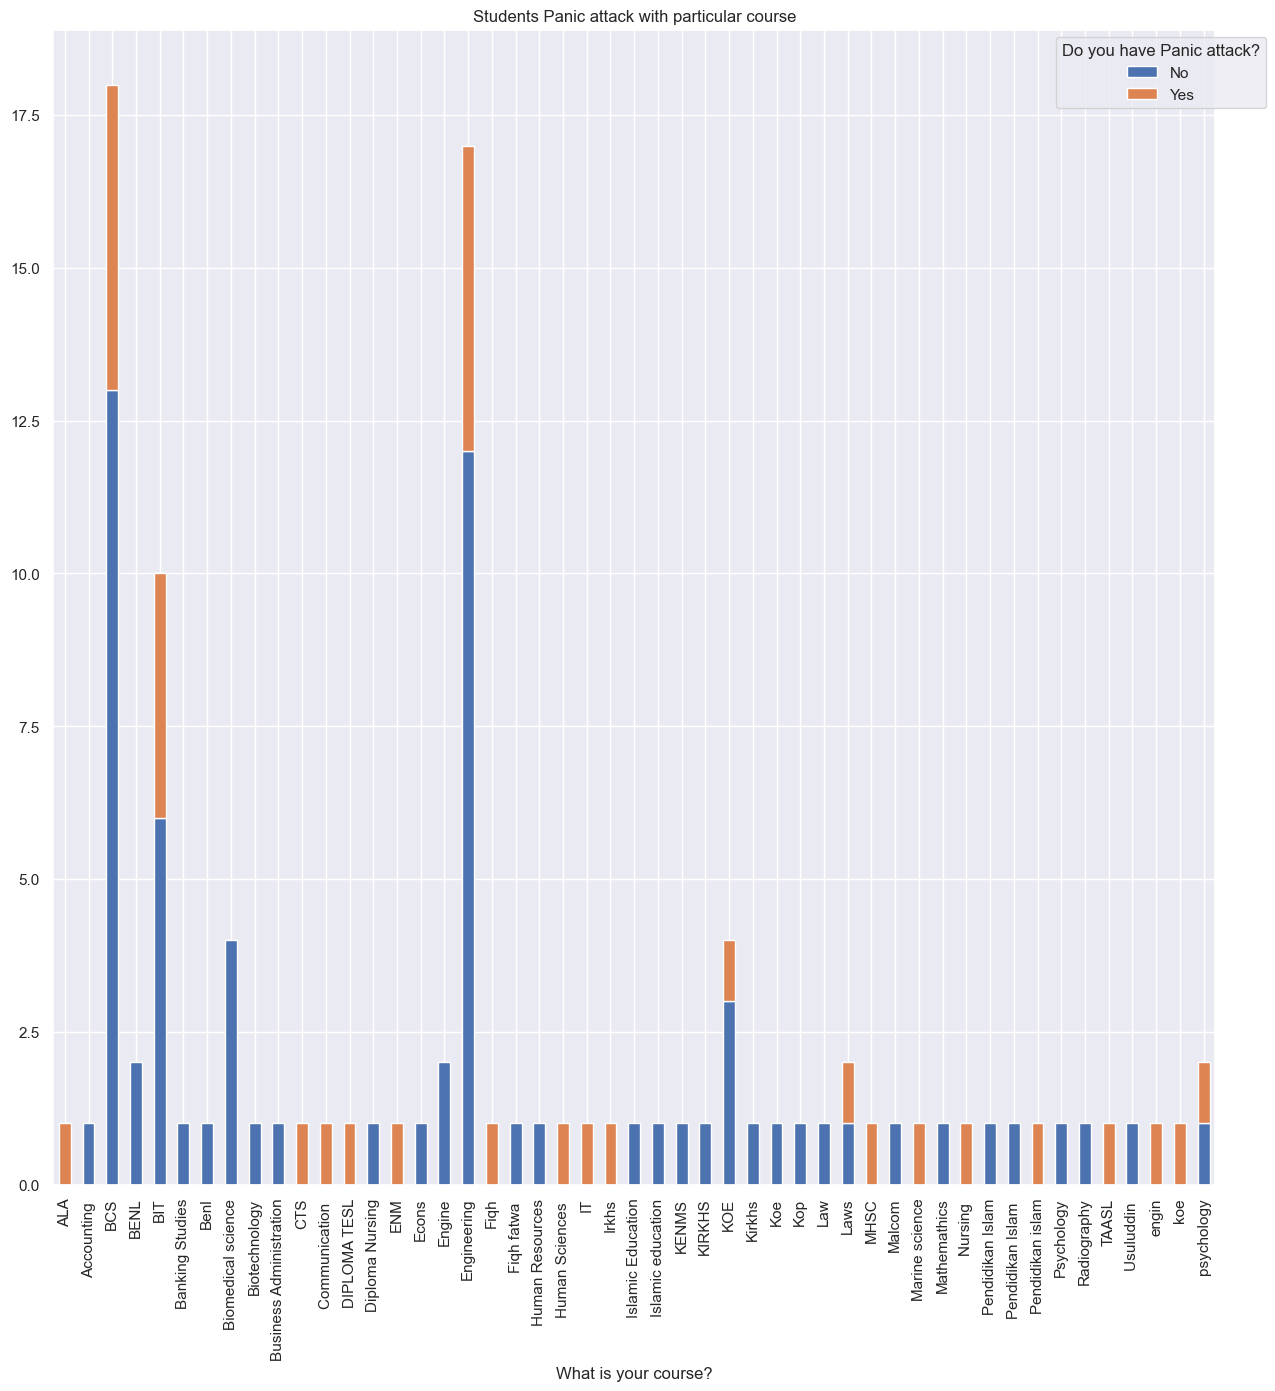

In [21]:
plot_stacking_bars(df_origin, 'What is your course?', 'Do you have Panic attack?', 'Students Panic attack with particular course')

Year of Study vs Depression

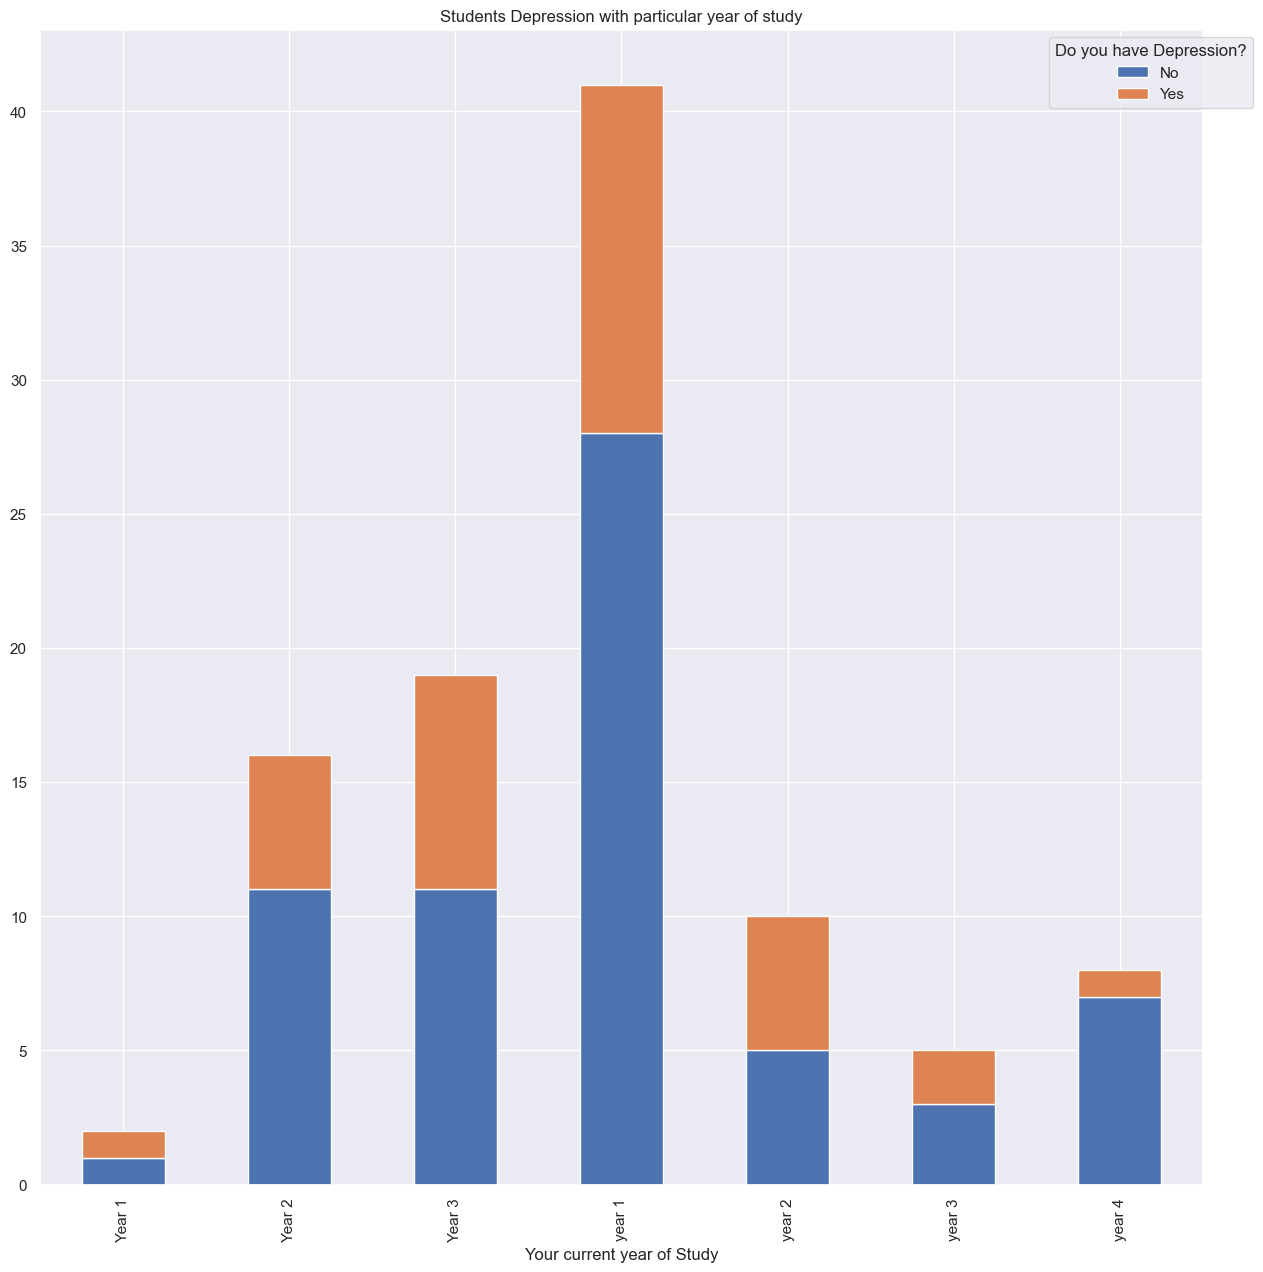

In [22]:
plot_stacking_bars(df_origin, 'Your current year of Study', 'Do you have Depression?', 'Students Depression with particular year of study')

Year of Study vs Panic Attack

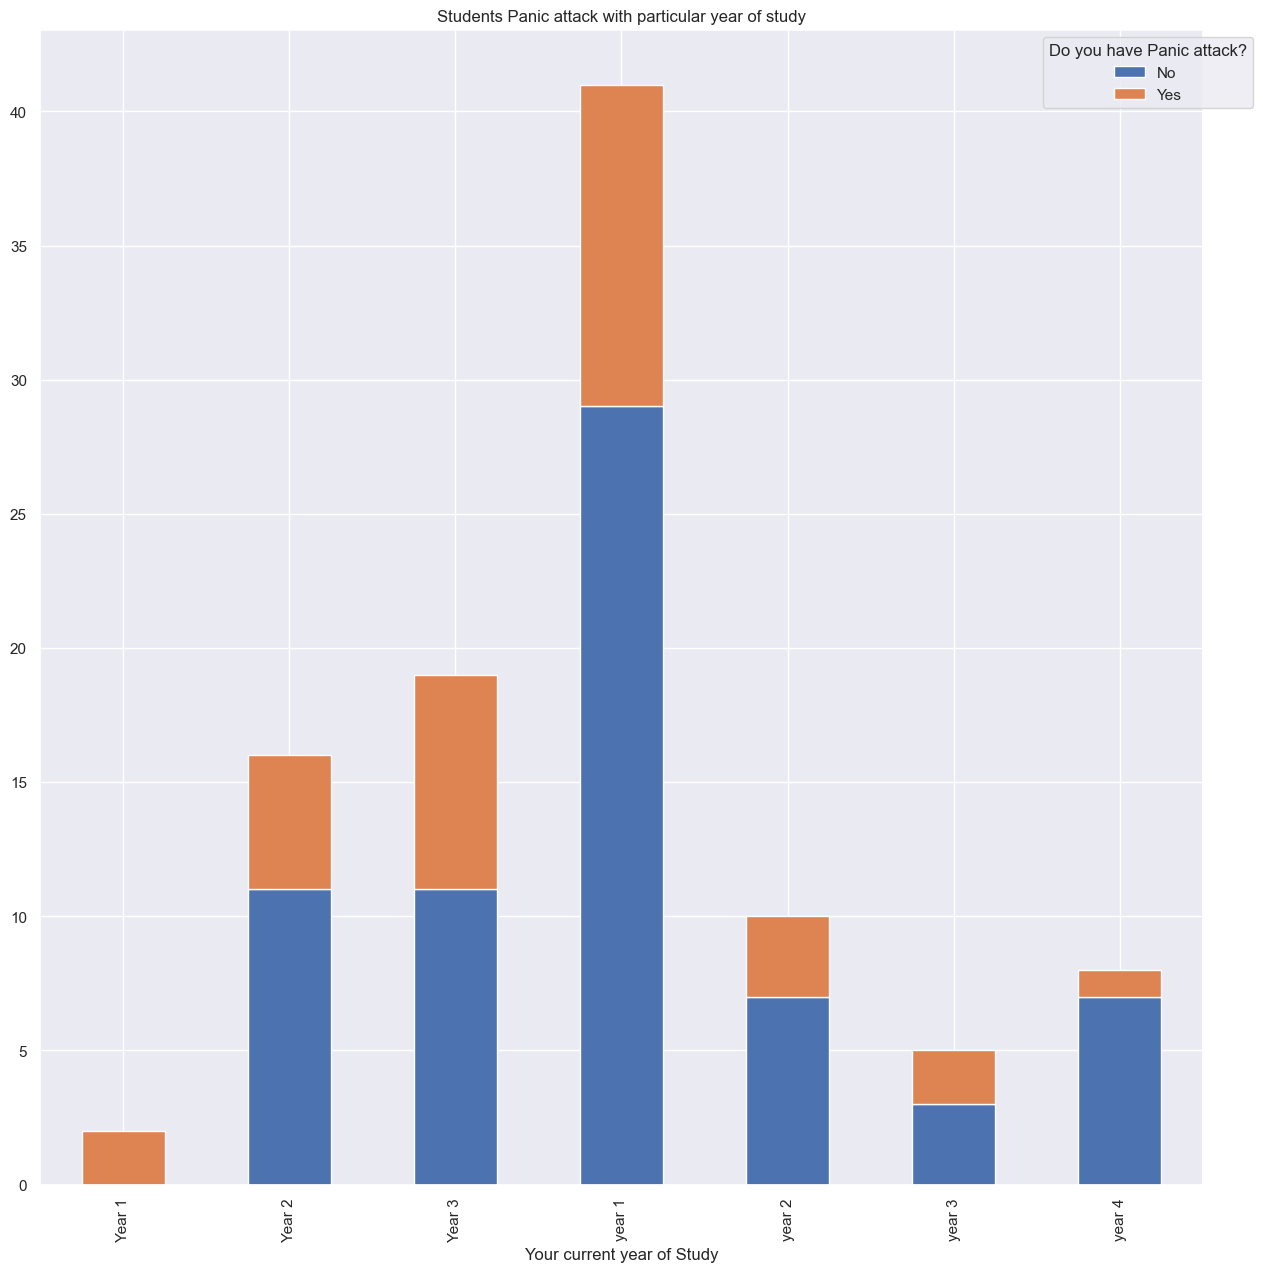

In [23]:
plot_stacking_bars(df_origin, 'Your current year of Study', 'Do you have Panic attack?', 'Students Panic attack with particular year of study')

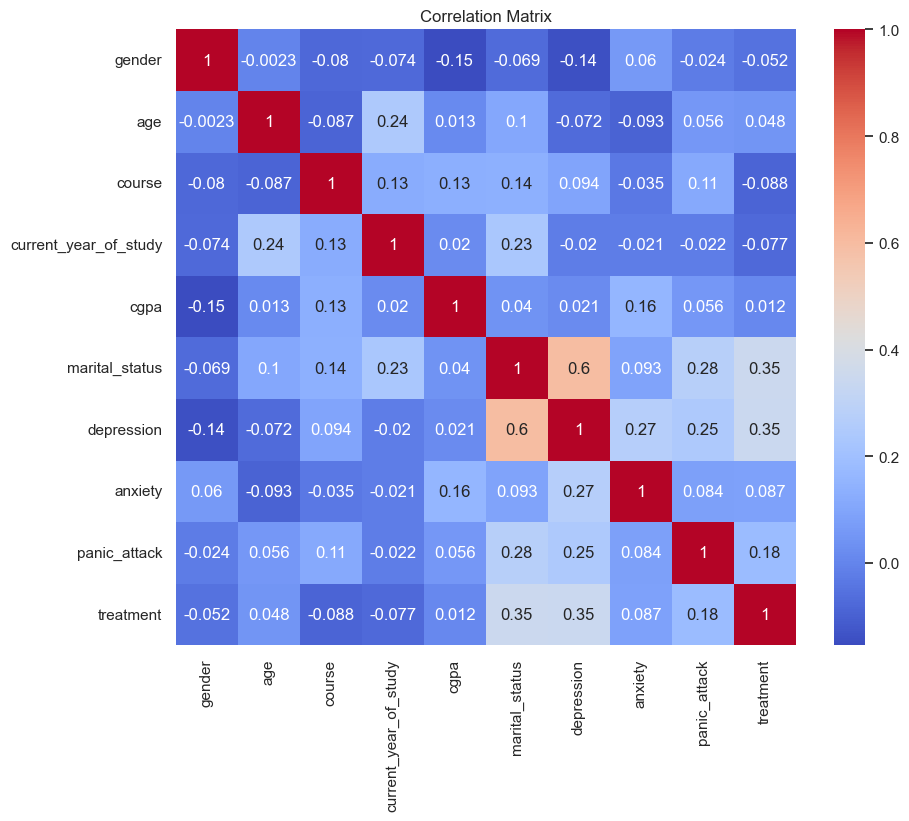

In [24]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

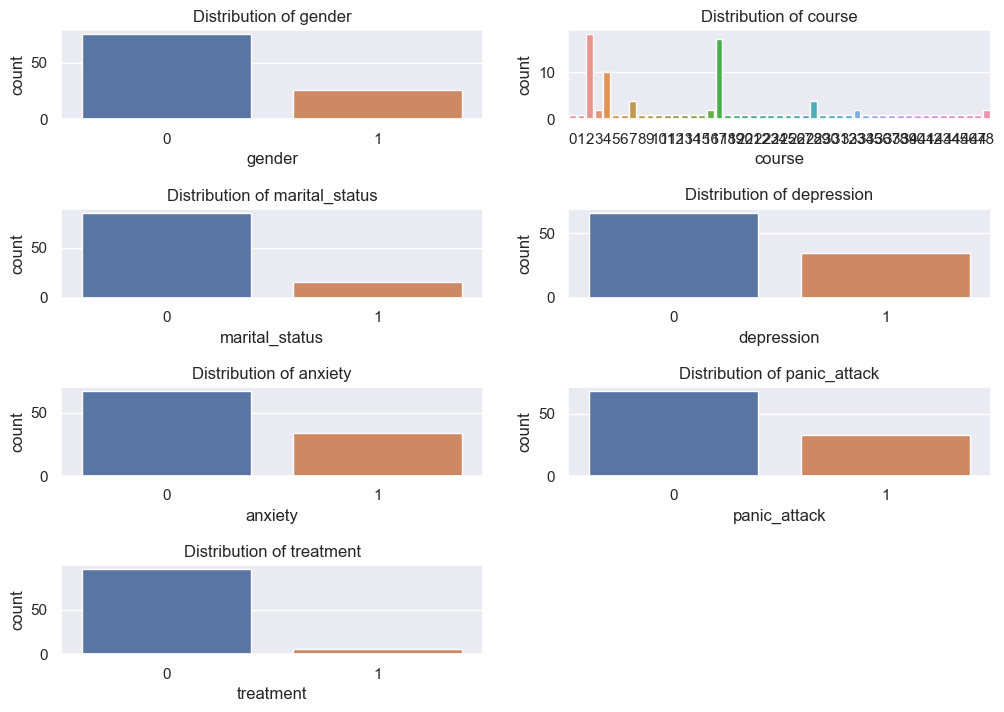

In [25]:
# Example usage
categorical_columns = ['gender', 'course','marital_status', 'depression', 'anxiety', 'panic_attack', 'treatment']
plot_categorical_columns(df,  categorical_columns)


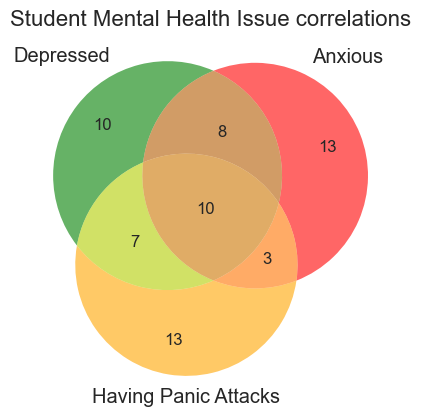

In [26]:
# Usage for three subsets
subset1 = set(df[df["depression"] == 1].index)
subset2 = set(df[df["anxiety"] == 1].index)
subset3 = set(df[df["panic_attack"] == 1].index)

plot_venn(subsets=[subset1, subset2, subset3], set_labels=("Depressed", "Anxious", "Having Panic Attacks"),
          set_colors=("Green", "Red", "Orange"), alpha=0.6, title="Student Mental Health Issue correlations")

In [27]:
subset1 = set(df[df["depression"] == 1].index)
subset2 = set(df[df["anxiety"] == 1].index)
subset3 = set(df[df["panic_attack"] == 1].index)

# Classification Models Array

## Define Models
* `class_distribution` - Plot to check is data is balanced
* `split_data` - Split the data, return **X_train, X_test, X_valid, y_train, y_test, y_valid**
* `SMOTE_resample` - Handle imbalanced data, return **X_res_df** resampled data
* `cnn_classifier_hp`  - CNN, return **model, prediction, training history**
* `dnn_classifier_hp` - DNN, return **model, prediction,  training history**
* `rnn_classifier_hp` - RNN, return **model, prediction,  training history**
* `mlp_classifier_hp` - MLP, return **model, prediction,  training history**
* `rf_classifier` - RF, return **model, prediction**
* `xgb_classifier` - XGBoost, return **model, prediction**
* `catboost_classifier` - Catboost, return **model, prediction**
* `soft_sv_classifier` - Soft Voting, return **model, prediction**

In [28]:
# Initialize a dictionary to store the predictions with classifier names and dataset number
predictions = {
    1: {  # Dataset 1
        'Depression': [],
        'Anxiety': [],
        'Panic_Attack': []
    },
    2: {  # Dataset 2
        'Suicide': [],
        'Depression': [],
        'Depression_Severity': []
    }
}

# Target columns:
*   Depression
*   Anxiety
*   Panic Attack

## Depression as Target

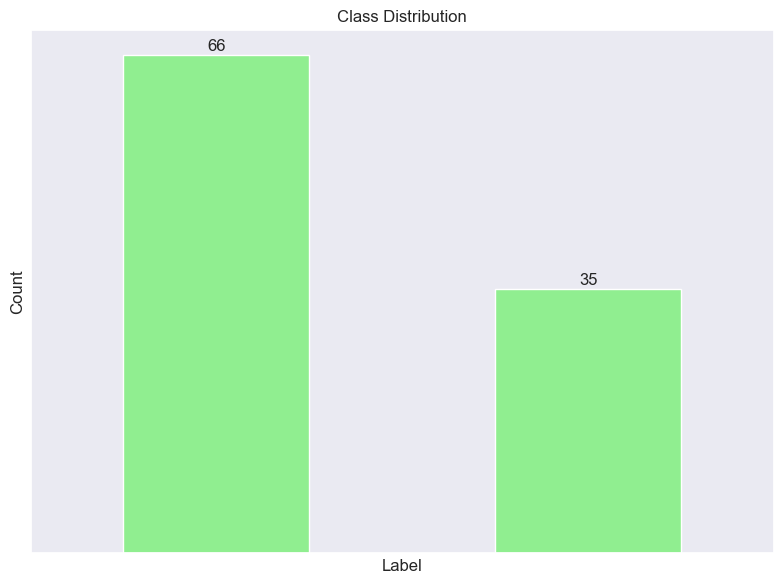

In [29]:
class_distribution(df, 'depression')

In [30]:
# Split the data
depression_df = SMOTE_resample(df, 'depression')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(depression_df, 'depression')

(78, 9)
(78,)
(27, 9)
(27,)
(27, 9)
(27,)


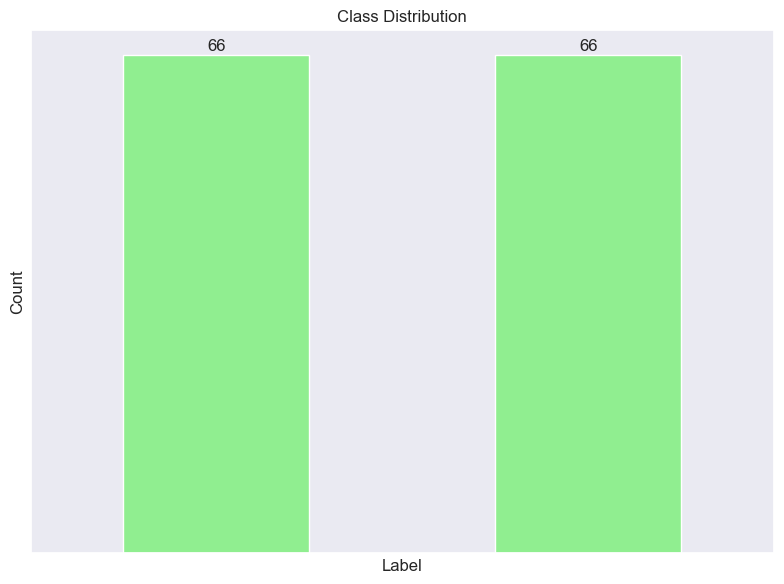

In [31]:
class_distribution(depression_df, 'depression')

### Deep Learning

In [32]:
# CNN Depression

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(64, activation='relu'), !! no need last layer
])

cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=75)

Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4897 - loss: 0.8849 - val_accuracy: 0.6667 - val_loss: 0.6826
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5245 - loss: 0.6756 - val_accuracy: 0.3704 - val_loss: 0.8349
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5033 - loss: 0.6826 - val_accuracy: 0.3704 - val_loss: 0.8496
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5839 - loss: 0.6779 - val_accuracy: 0.3704 - val_loss: 0.8092
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6135 - loss: 0.6580 - val_accuracy: 0.4815 - val_loss: 0.7067
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5892 - loss: 0.6445 - val_accuracy: 0.5926 - val_loss: 0.6888
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5867 - loss: 0.6353 - val_accuracy: 0.4444 - val_loss: 0.7328
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5452 - loss: 0.6299 - val_accuracy: 0.5556 - val_loss: 0.7154


In [33]:
# CNN Hyperparameter tuning
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5287 - loss: 1.9622 - val_accuracy: 0.6296 - val_loss: 0.6878
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6202 - loss: 0.7237 - val_accuracy: 0.3333 - val_loss: 0.8045
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5622 - loss: 0.6807 - val_accuracy: 0.6296 - val_loss: 0.6899
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5864 - loss: 0.6849 - val_accuracy: 0.3704 - val_loss: 0.7889
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5335 - loss: 0.6739 - val_accuracy: 0.3704 - val_loss: 0.7926
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4766 - loss: 0.6696 - val_accuracy: 0.4815 - val_loss: 0.7322
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5477 - loss: 0.6543 - val_accuracy: 0.5926 - val_loss: 0.7120
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0

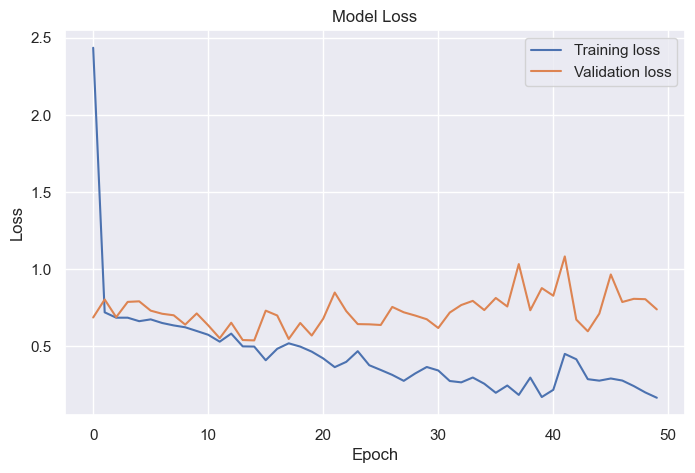

In [34]:
plot_history(cnn_hist)

In [35]:
# DNN Depression

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    LSTM(units=64, activation='tanh', return_sequences=True),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(64, activation='relu'), !! no need last layer
])

dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=75)

Epoch 1/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5583 - loss: 0.6884 - val_accuracy: 0.3333 - val_loss: 0.7367
Epoch 2/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5270 - loss: 0.6860 - val_accuracy: 0.3704 - val_loss: 0.7269
Epoch 3/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5103 - loss: 0.6700 - val_accuracy: 0.4074 - val_loss: 0.7473
Epoch 4/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5530 - loss: 0.6538 - val_accuracy: 0.5185 - val_loss: 0.7440
Epoch 5/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5452 - loss: 0.6441 - val_accuracy: 0.5926 - val_loss: 0.7087
Epoch 6/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6113 - loss: 0.6571 - val_accuracy: 0.6296 - val_loss: 0.6594
Epoch 7/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6447 - loss: 0.6483 - val_accuracy: 0.5185 - val_loss: 0.7849
Epoch 8/75
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5505 - loss: 0.6593 - val_accuracy: 0.4074 - val_loss: 0.8230

In [36]:
# DNN Hyperparameter tuning
dnn, best_param_dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\dnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.5309 - loss: 0.7559 - val_accuracy: 0.3333 - val_loss: 0.8354
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4406 - loss: 0.7771 - val_accuracy: 0.3333 - val_loss: 0.8368
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5583 - loss: 0.7268 - val_accuracy: 0.3704 - val_loss: 0.7340
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4665 - loss: 0.7367 - val_accuracy: 0.5926 - val_loss: 0.7230
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5622 - loss: 0.7351 - val_accuracy: 0.3333 - val_loss: 0.7890
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5270 - loss: 0.7232 - val_accuracy: 0.3333 - val_loss: 0.7721
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5192 - loss: 0.7180 - val_accuracy: 0.3333 - val_loss: 0.7632
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 

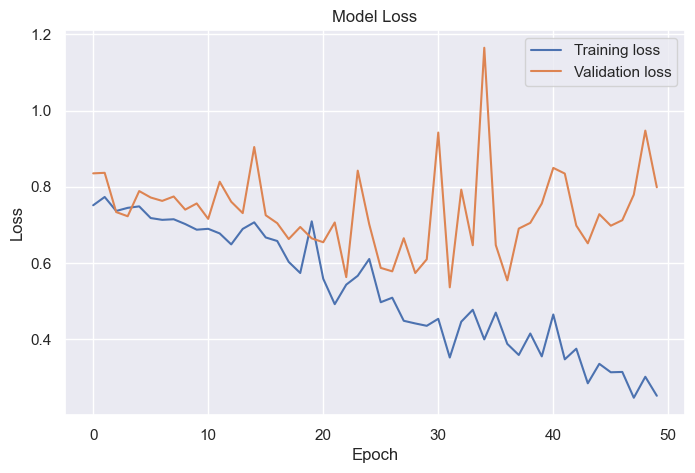

In [37]:
plot_history(dnn_hist)

In [38]:
# RNN Depression

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    SimpleRNN(64),
    Dense(32, activation='relu'),
    # Dense(1, activation='sigmoid'), !! no need last layer
])

rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5220 - loss: 0.6890 - val_accuracy: 0.4444 - val_loss: 0.6995
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5346 - loss: 0.6667 - val_accuracy: 0.5926 - val_loss: 0.6781
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7016 - loss: 0.6417 - val_accuracy: 0.4815 - val_loss: 0.6786
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6668 - loss: 0.6251 - val_accuracy: 0.6667 - val_loss: 0.6679
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7237 - loss: 0.6087 - val_accuracy: 0.6667 - val_loss: 0.6451
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8168 - loss: 0.5893 - val_accuracy: 0.6667 - val_loss: 0.6188
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7934 - loss: 0.5822 - val_accuracy: 0.6667 - val_loss: 0.6263
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7663 - loss: 0.5859 - val_accuracy: 0.5556 - val_loss: 0.6596

In [39]:
# RNN Hyperparameter tuning
rnn, best_param_rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\rnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.4872 - loss: 2.4374 - val_accuracy: 0.3333 - val_loss: 2.4785
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5594 - loss: 2.3970 - val_accuracy: 0.3333 - val_loss: 2.4647
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5982 - loss: 2.3591 - val_accuracy: 0.4815 - val_loss: 2.3934
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5881 - loss: 2.3368 - val_accuracy: 0.4815 - val_loss: 2.3783
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6149 - loss: 2.3168 - val_accuracy: 0.4444 - val_loss: 2.4177
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6590 - loss: 2.2974 - val_accuracy: 0.4074 - val_loss: 2.4012
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6383 - loss: 2.2819 - val_accuracy: 0.5556 - val_loss: 2.3477
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 

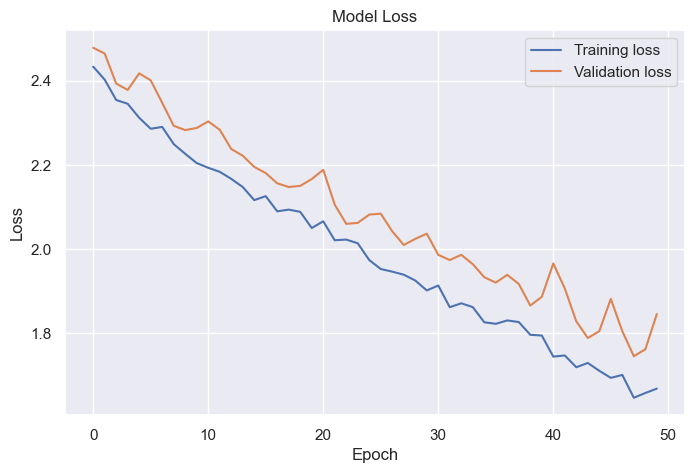

In [40]:
plot_history(rnn_hist)

In [41]:
# MLP Depression

# Custom
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(1, activation='sigmoid'),
])

mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid, model, epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5388 - loss: 1.3457 - val_accuracy: 0.3704 - val_loss: 0.9398
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4459 - loss: 0.7941 - val_accuracy: 0.7037 - val_loss: 0.6662
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5014 - loss: 0.8489 - val_accuracy: 0.6667 - val_loss: 0.6231
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4584 - loss: 0.7460 - val_accuracy: 0.4815 - val_loss: 0.7581
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5580 - loss: 0.6588 - val_accuracy: 0.4444 - val_loss: 0.9462
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5996 - loss: 0.6926 - val_accuracy: 0.4444 - val_loss: 0.9852
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6230 - loss: 0.6611 - val_accuracy: 0.4074 - val_loss: 0.9101
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5530 - loss: 0.6525 - val_accuracy: 0.5926 - val_loss: 0.7311


In [42]:
# MLP Hyperparameter Tuning 
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\mlp_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4032 - loss: 1.5128 - val_accuracy: 0.3333 - val_loss: 1.1444
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5192 - loss: 0.8550 - val_accuracy: 0.3704 - val_loss: 0.9167
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6035 - loss: 0.6309 - val_accuracy: 0.6667 - val_loss: 0.6504
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6372 - loss: 0.7205 - val_accuracy: 0.6667 - val_loss: 0.6352
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6461 - loss: 0.6633 - val_accuracy: 0.5926 - val_loss: 0.7722
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6355 - loss: 0.6228 - val_accuracy: 0.4444 - val_loss: 0.8549
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5594 - loss: 0.6479 - val_accuracy: 0.7037 - val_loss: 0.6457
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0

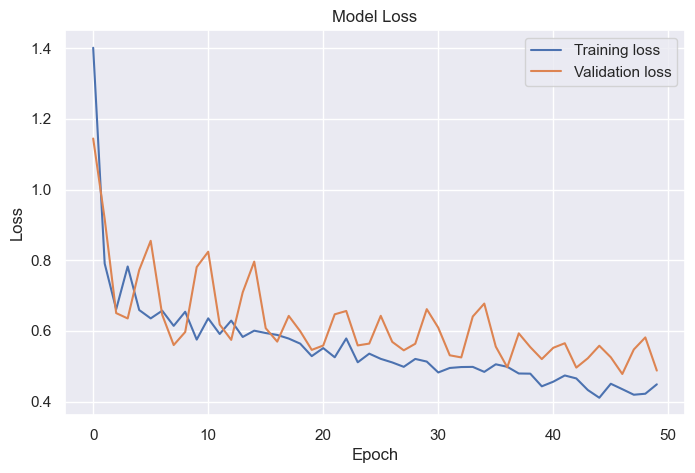

In [43]:
plot_history(mlp_hist)

### Ensemble Learning

In [44]:
# Random Forest Depression
rf, y_pred_rf, rf_accuracy = random_forest_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.83      0.67      0.74        15

    accuracy                           0.74        27
   macro avg       0.75      0.75      0.74        27
weighted avg       0.76      0.74      0.74        27



In [45]:
# Hyperparameter Tuning for Random Forest - Depression
param_grid_rf = {
    'n_estimators': [50, 100, 200 , 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': [5, 7, 9, 10],
    'random_state': [42, 101],
}

rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [46]:
# XGBoost Depression
xgb, y_pred_xgb, xgb_accuracy = xgboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.90      0.60      0.72        15

    accuracy                           0.74        27
   macro avg       0.77      0.76      0.74        27
weighted avg       0.79      0.74      0.74        27



In [47]:
# Hyperparameter Tuning for XGBoost - Depression
param_grid_xgb = {
    'n_estimators': [50, 100, 200 , 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'random_state': [42, 101],
}

xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [48]:
# Catboost Depression
cat, y_pred_cat, cat_accuracy = catboost_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.028632
0:	learn: 0.6898771	total: 146ms	remaining: 14.4s
1:	learn: 0.6855320	total: 146ms	remaining: 7.16s
2:	learn: 0.6807652	total: 147ms	remaining: 4.75s
3:	learn: 0.6757467	total: 148ms	remaining: 3.54s
4:	learn: 0.6705170	total: 148ms	remaining: 2.82s
5:	learn: 0.6669164	total: 149ms	remaining: 2.33s
6:	learn: 0.6622702	total: 149ms	remaining: 1.98s
7:	learn: 0.6590453	total: 150ms	remaining: 1.72s
8:	learn: 0.6552446	total: 150ms	remaining: 1.52s
9:	learn: 0.6505950	total: 151ms	remaining: 1.35s
10:	learn: 0.6468960	total: 151ms	remaining: 1.22s
11:	learn: 0.6429008	total: 152ms	remaining: 1.11s
12:	learn: 0.6393507	total: 153ms	remaining: 1.02s
13:	learn: 0.6367862	total: 153ms	remaining: 942ms
14:	learn: 0.6336274	total: 154ms	remaining: 873ms
15:	learn: 0.6293744	total: 155ms	remaining: 812ms
16:	learn: 0.6257567	total: 156ms	remaining: 759ms
17:	learn: 0.6220554	total: 156ms	remaining: 711ms
18:	learn: 0.6195194	total: 156ms	remaining: 667ms
19:	learn: 

In [49]:
# Hyperparameter Tuning for Catboost- Depression
param_grid_cat = {
    'n_estimators': [50, 100, 200, 300],
    'random_state': [42, 101],
    'learning_rate': [0.01, 0.1, 0.5],
}

cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 0.6920026	total: 653us	remaining: 32ms
1:	learn: 0.6904705	total: 1.33ms	remaining: 32ms
2:	learn: 0.6887705	total: 1.87ms	remaining: 29.3ms
3:	learn: 0.6869531	total: 2.39ms	remaining: 27.5ms
4:	learn: 0.6850270	total: 2.66ms	remaining: 23.9ms
5:	learn: 0.6837147	total: 2.87ms	remaining: 21.1ms
6:	learn: 0.6819529	total: 3.16ms	remaining: 19.4ms
7:	learn: 0.6807573	total: 3.6ms	remaining: 18.9ms
8:	learn: 0.6793668	total: 4.07ms	remaining: 18.5ms
9:	learn: 0.6775655	total: 4.43ms	remaining: 17.7ms
10:	learn: 0.6761597	total: 4.83ms	remaining: 17.1ms
11:	learn: 0.6746701	total: 5.28ms	remaining: 16.7ms
12:	learn: 0.6731660	total: 5.75ms	remaining: 16.4ms
13:	learn: 0.6721565	total: 6.17ms	remaining: 15.9ms
14:	learn: 0.6707677	total: 6.72ms	remaining: 15.7ms
15:	learn: 0.6691016	total: 7.22ms	remaining: 15.3ms
16:	learn: 0.6675693	total: 7.63ms	remaining: 14.8ms
17:	learn: 0.6663101	total: 8.11ms	remaining: 14.4ms
18:	learn: 0.6648443	total: 8.56ms	remaining: 14ms
19:	learn: 

In [50]:
# Soft Voting Depression
sv, y_pred_sv, sv_accuracy = sv_classifier(X_train, X_test, X_valid, y_train, y_test, y_valid)

Learning rate set to 0.028632
0:	learn: 0.6898771	total: 734us	remaining: 72.7ms
1:	learn: 0.6855320	total: 1.52ms	remaining: 74.6ms
2:	learn: 0.6807652	total: 2.2ms	remaining: 71ms
3:	learn: 0.6757467	total: 2.87ms	remaining: 68.8ms
4:	learn: 0.6705170	total: 3.32ms	remaining: 63.1ms
5:	learn: 0.6669164	total: 3.65ms	remaining: 57.3ms
6:	learn: 0.6622702	total: 4.08ms	remaining: 54.2ms
7:	learn: 0.6590453	total: 4.66ms	remaining: 53.6ms
8:	learn: 0.6552446	total: 5.29ms	remaining: 53.5ms
9:	learn: 0.6505950	total: 5.68ms	remaining: 51.1ms
10:	learn: 0.6468960	total: 6.39ms	remaining: 51.7ms
11:	learn: 0.6429008	total: 6.97ms	remaining: 51.1ms
12:	learn: 0.6393507	total: 7.6ms	remaining: 50.8ms
13:	learn: 0.6367862	total: 8.22ms	remaining: 50.5ms
14:	learn: 0.6336274	total: 8.78ms	remaining: 49.7ms
15:	learn: 0.6293744	total: 9.37ms	remaining: 49.2ms
16:	learn: 0.6257567	total: 10ms	remaining: 49ms
17:	learn: 0.6220554	total: 10.5ms	remaining: 47.7ms
18:	learn: 0.6195194	total: 11ms	re

In [51]:
# Hyperparameter Tuning for Soft Voting - Depression
param_grid_sv = {
    'voting': ['hard', 'soft'],
    'estimators': [{'rf': rf, 'xgb': xgb, 'cat': cat}],
    'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]
}

sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.003466
0:	learn: 0.6909923	total: 1.35ms	remaining: 1.35s
1:	learn: 0.6894445	total: 3.07ms	remaining: 1.53s
2:	learn: 0.6872461	total: 4.38ms	remaining: 1.46s
3:	learn: 0.6851314	total: 5.66ms	remaining: 1.41s
4:	learn: 0.6832174	total: 6.91ms	remaining: 1.37s
5:	learn: 0.6809460	total: 8.35ms	remaining: 1.38s
6:	learn: 0.6790740	total: 9.62ms	remaining: 1.36s
7:	learn: 0.6774551	total: 10.9ms	remaining: 1.35s
8:	learn: 0.6757328	total: 12.2ms	remaining: 1.34s
9:	learn: 0.6736737	total: 13.5ms	remaining: 1.34s
10:	learn: 0.6713862	total: 14.9ms	remaining: 1.34s
11:	learn: 0.6695557	total: 16.3ms	remaining: 1.34s
12:	learn: 0.6672781	total: 17.6ms	remaining: 1.33s
13:	learn: 0.6655725	total: 18.8ms	remaining: 1.33s
14:	learn: 0.6639249	total: 20.2ms	remaining: 1.32s
15:	learn: 0.6622383	total: 21.7ms	remaining: 1.34s
16:	learn: 0.6600900	total: 23.1ms	remaining: 1.34s
17:	learn: 0.6579139	total: 24.5ms	remaining: 1.33s
18:	learn: 0.6562164	total: 25.9ms	remaining

### Store Results

In [52]:
# Store results to dictionaries Depression
predictions[1]['Depression'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[1]['Depression'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[1]['Depression'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[1]['Depression'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[1]['Depression'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[1]['Depression'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[1]['Depression'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[1]['Depression'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [53]:
for model in predictions[1]['Depression'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[1]['Depression'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.7407407164573669
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
           

### Error Analysis

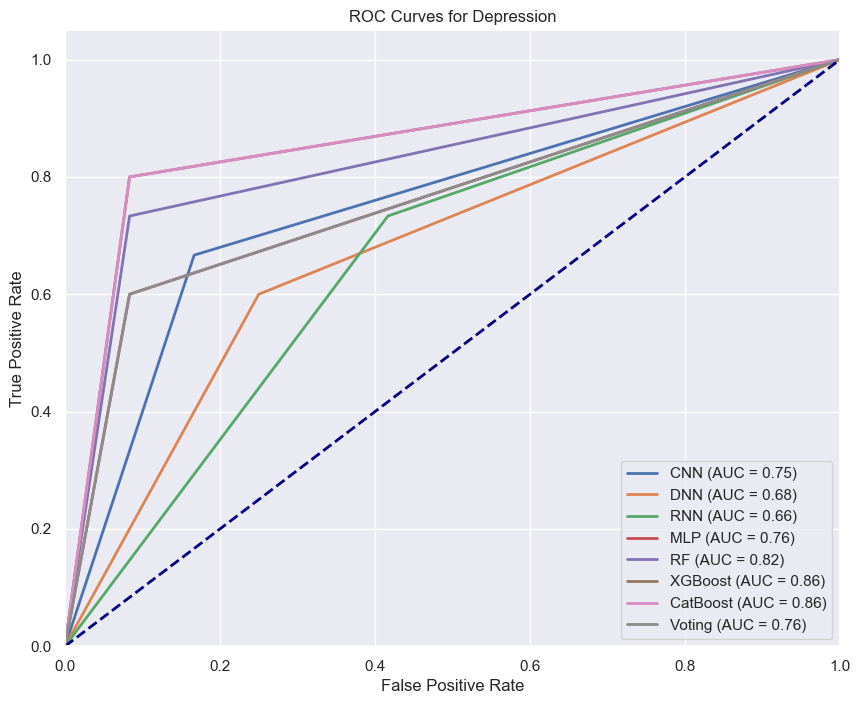

In [54]:
plot_all_roc_curves(predictions, 1, 'Depression')

## Anxiety as Target

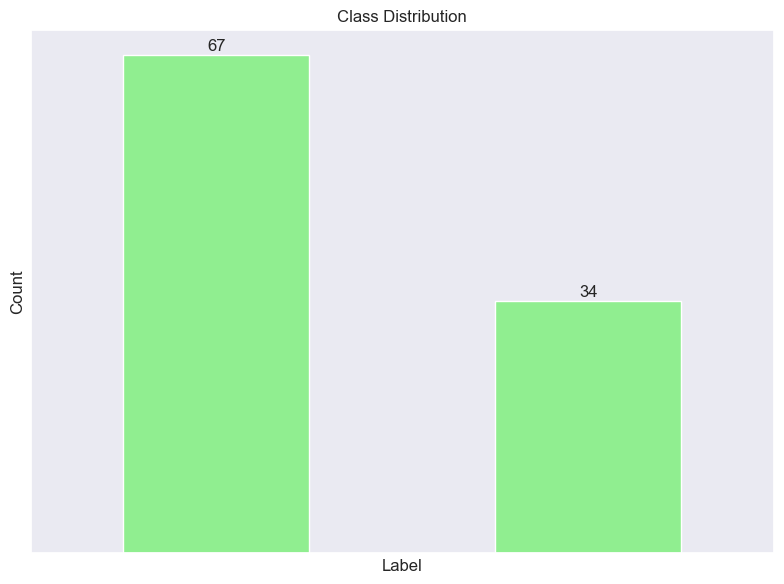

In [55]:
class_distribution(df, 'anxiety')

In [56]:
# Split the data
anxiety_df = SMOTE_resample(df, 'anxiety')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(anxiety_df, 'anxiety')

(80, 9)
(80,)
(27, 9)
(27,)
(27, 9)
(27,)


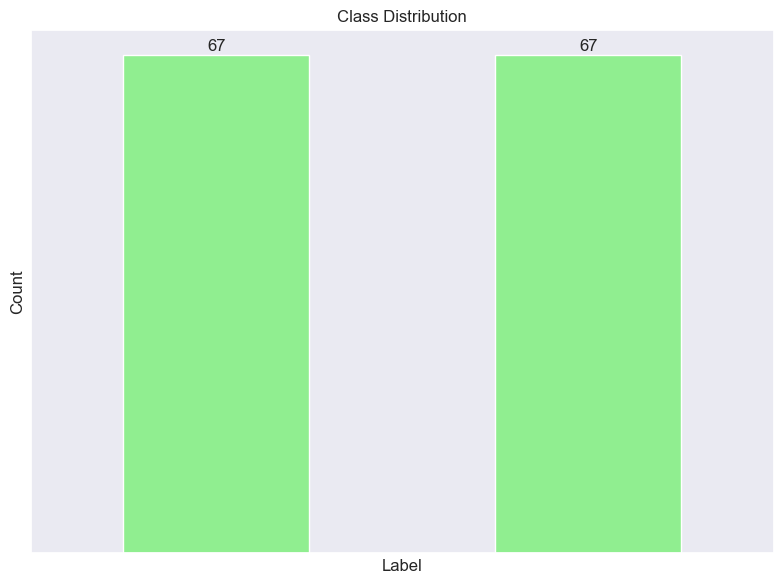

In [57]:
class_distribution(anxiety_df, 'anxiety')

### Deep Learning

In [58]:
# CNN Anxiety
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5258 - loss: 1.7449 - val_accuracy: 0.5185 - val_loss: 1.4420
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4836 - loss: 1.3737 - val_accuracy: 0.4815 - val_loss: 1.1284
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5250 - loss: 1.1389 - val_accuracy: 0.5185 - val_loss: 1.0771
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4984 - loss: 1.0885 - val_accuracy: 0.5185 - val_loss: 1.1193
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5063 - loss: 1.1053 - val_accuracy: 0.4815 - val_loss: 1.0630
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4703 - loss: 1.0652 - val_accuracy: 0.4815 - val_loss: 1.0368
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3734 - loss: 1.0587 - val_accuracy: 0.5185 - val_loss: 1.0149
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0

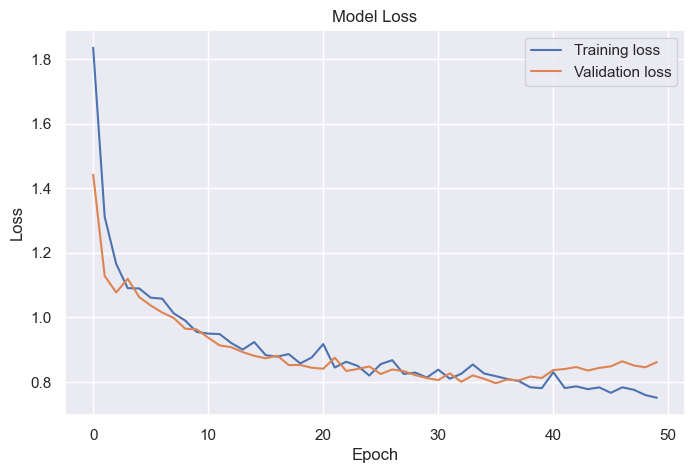

In [59]:
plot_history(cnn_hist)

In [60]:
# DNN Anxiety
dnn, best_param_dnn,  y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\dnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5453 - loss: 0.8190 - val_accuracy: 0.4815 - val_loss: 0.8564
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4094 - loss: 0.8720 - val_accuracy: 0.5185 - val_loss: 0.7317
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3367 - loss: 0.7726 - val_accuracy: 0.4815 - val_loss: 0.7381
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4781 - loss: 0.7317 - val_accuracy: 0.5185 - val_loss: 0.7386
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5180 - loss: 0.7402 - val_accuracy: 0.5185 - val_loss: 0.7383
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5063 - loss: 0.7385 - val_accuracy: 0.5185 - val_loss: 0.7283
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5102 - loss: 0.7265 - val_accuracy: 0.4074 - val_loss: 0.7277
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 

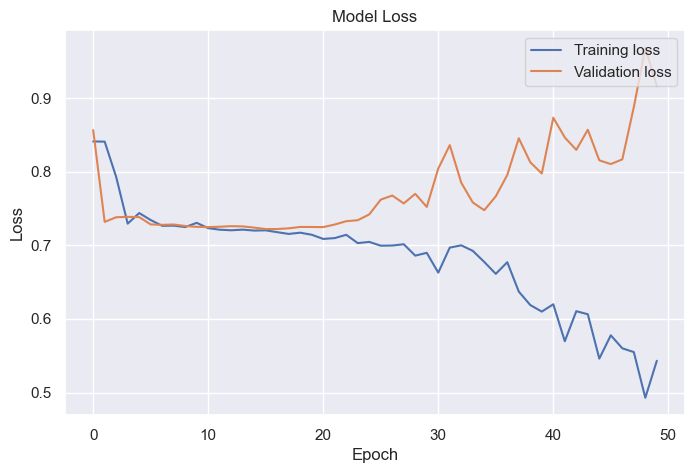

In [61]:
plot_history(dnn_hist)

In [62]:
# RNN Anxiety
rnn, best_param_rnn,  y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\rnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4938 - loss: 1.0233 - val_accuracy: 0.5185 - val_loss: 0.9342
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5375 - loss: 0.9313 - val_accuracy: 0.4074 - val_loss: 0.9590
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6430 - loss: 0.8708 - val_accuracy: 0.4444 - val_loss: 1.0538
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5883 - loss: 0.8870 - val_accuracy: 0.3704 - val_loss: 1.0086
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6445 - loss: 0.8454 - val_accuracy: 0.3704 - val_loss: 0.9494
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5844 - loss: 0.8456 - val_accuracy: 0.4444 - val_loss: 0.8989
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6789 - loss: 0.8414 - val_accuracy: 0.4444 - val_loss: 0.9057
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 

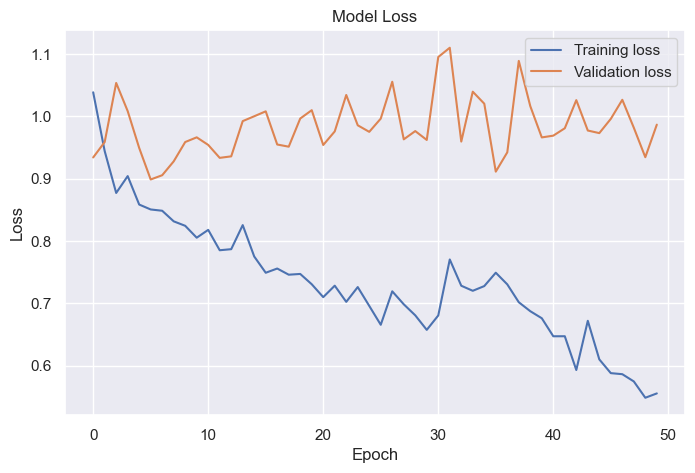

In [63]:
plot_history(rnn_hist)

In [64]:
# MLP Anxiety
mlp, best_param_mlp,  y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\mlp_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4609 - loss: 0.9445 - val_accuracy: 0.4815 - val_loss: 0.7421
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5031 - loss: 0.7696 - val_accuracy: 0.4815 - val_loss: 0.8581
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5375 - loss: 0.7704 - val_accuracy: 0.4074 - val_loss: 0.8820
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5352 - loss: 0.7265 - val_accuracy: 0.4815 - val_loss: 0.8026
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4852 - loss: 0.7418 - val_accuracy: 0.4815 - val_loss: 0.8368
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5523 - loss: 0.6833 - val_accuracy: 0.4815 - val_loss: 0.7849
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6367 - loss: 0.6698 - val_accuracy: 0.4815 - val_loss: 0.8448
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0

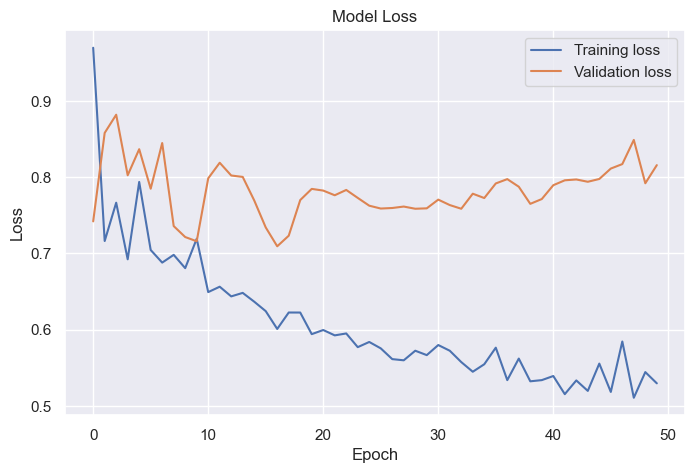

In [65]:
plot_history(mlp_hist)

### Ensemble Learning

In [66]:
# Random Forest Anxiety
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [67]:
# Xgboost Anxiety
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [68]:
# Catboost Anxiety
cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 0.6921269	total: 893us	remaining: 43.8ms
1:	learn: 0.6909331	total: 1.76ms	remaining: 42.2ms
2:	learn: 0.6904206	total: 2.1ms	remaining: 32.9ms
3:	learn: 0.6896670	total: 2.83ms	remaining: 32.6ms
4:	learn: 0.6894198	total: 3.26ms	remaining: 29.3ms
5:	learn: 0.6887747	total: 3.99ms	remaining: 29.3ms
6:	learn: 0.6882994	total: 4.43ms	remaining: 27.2ms
7:	learn: 0.6875917	total: 5.06ms	remaining: 26.6ms
8:	learn: 0.6869483	total: 5.84ms	remaining: 26.6ms
9:	learn: 0.6862191	total: 6.51ms	remaining: 26ms
10:	learn: 0.6853846	total: 7.5ms	remaining: 26.6ms
11:	learn: 0.6847619	total: 8.18ms	remaining: 25.9ms
12:	learn: 0.6838148	total: 8.85ms	remaining: 25.2ms
13:	learn: 0.6829616	total: 9.42ms	remaining: 24.2ms
14:	learn: 0.6817704	total: 10.1ms	remaining: 23.6ms
15:	learn: 0.6813865	total: 10.7ms	remaining: 22.7ms
16:	learn: 0.6807578	total: 11.5ms	remaining: 22.3ms
17:	learn: 0.6800022	total: 12.2ms	remaining: 21.7ms
18:	learn: 0.6791127	total: 12.8ms	remaining: 20.9ms
19:	lear

In [69]:
# Soft Voting Anxiety
sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.003504
0:	learn: 0.6916910	total: 1.64ms	remaining: 1.64s
1:	learn: 0.6904635	total: 3.17ms	remaining: 1.58s
2:	learn: 0.6895596	total: 4.46ms	remaining: 1.48s
3:	learn: 0.6888642	total: 5.8ms	remaining: 1.45s
4:	learn: 0.6880101	total: 7.23ms	remaining: 1.44s
5:	learn: 0.6877264	total: 8.5ms	remaining: 1.41s
6:	learn: 0.6869549	total: 9.87ms	remaining: 1.4s
7:	learn: 0.6861880	total: 11.4ms	remaining: 1.41s
8:	learn: 0.6854389	total: 12.7ms	remaining: 1.39s
9:	learn: 0.6844317	total: 14.3ms	remaining: 1.41s
10:	learn: 0.6836845	total: 15.7ms	remaining: 1.41s
11:	learn: 0.6828221	total: 17.1ms	remaining: 1.41s
12:	learn: 0.6823674	total: 18.4ms	remaining: 1.39s
13:	learn: 0.6812517	total: 19.6ms	remaining: 1.38s
14:	learn: 0.6806859	total: 21ms	remaining: 1.38s
15:	learn: 0.6799965	total: 22.3ms	remaining: 1.37s
16:	learn: 0.6787722	total: 23.6ms	remaining: 1.36s
17:	learn: 0.6777870	total: 25ms	remaining: 1.36s
18:	learn: 0.6765164	total: 26.4ms	remaining: 1.36s

### Store Results

In [70]:
# Store results to dictionaries Anxiety
predictions[1]['Anxiety'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[1]['Anxiety'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[1]['Anxiety'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[1]['Anxiety'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[1]['Anxiety'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[1]['Anxiety'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[1]['Anxiety'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[1]['Anxiety'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [71]:
for model in predictions[1]['Anxiety'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[1]['Anxiety'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.4444444477558136
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
           

### Error Analysis

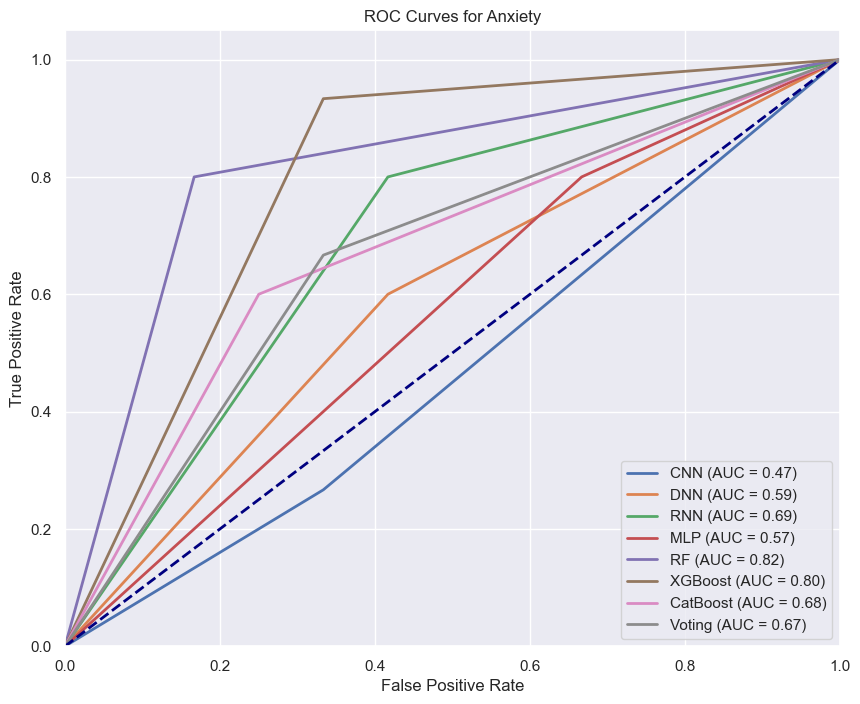

In [72]:
plot_all_roc_curves(predictions, 1, 'Anxiety')

## Panic Attack as Target

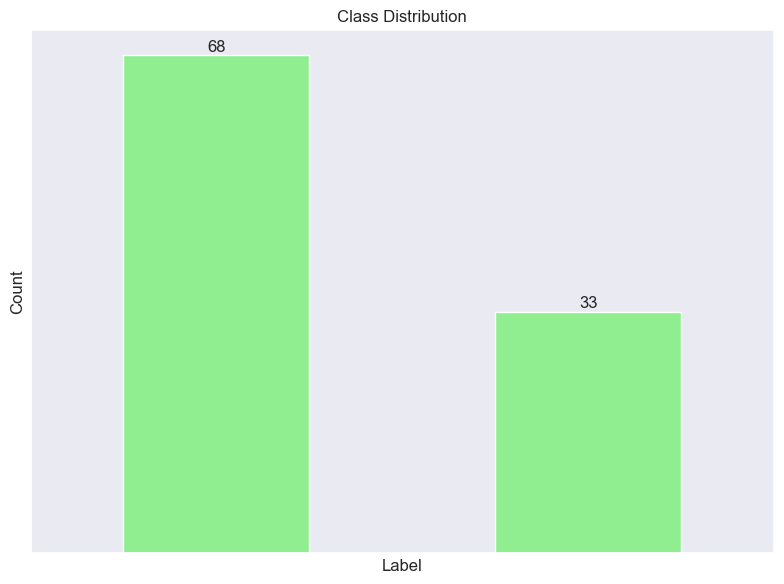

In [73]:
class_distribution(df, 'panic_attack')

In [74]:
pa_df = SMOTE_resample(df, 'panic_attack')
X_train, X_test, X_valid, y_train, y_test, y_valid = split_data(pa_df, 'panic_attack')

(81, 9)
(81,)
(27, 9)
(27,)
(28, 9)
(28,)


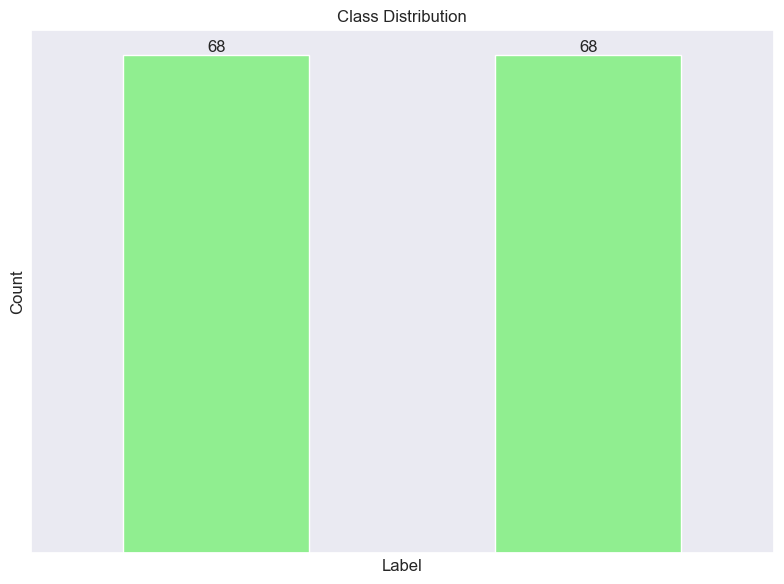

In [75]:
class_distribution(pa_df, 'panic_attack')

### Deep Learning

In [76]:
# CNN Panic Attack
cnn, best_param_cnn, y_pred_cnn, cnn_accuracy, cnn_hist = cnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\cnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4511 - loss: 1.6602 - val_accuracy: 0.4815 - val_loss: 1.2623
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5070 - loss: 1.2550 - val_accuracy: 0.5185 - val_loss: 1.1676
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5607 - loss: 1.1451 - val_accuracy: 0.4815 - val_loss: 1.2090
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4728 - loss: 1.2009 - val_accuracy: 0.5185 - val_loss: 1.1279
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5382 - loss: 1.1432 - val_accuracy: 0.5185 - val_loss: 1.1151
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5691 - loss: 1.0996 - val_accuracy: 0.4815 - val_loss: 1.1591
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4852 - loss: 1.1427 - val_accuracy: 0.4815 - val_loss: 1.0775
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0

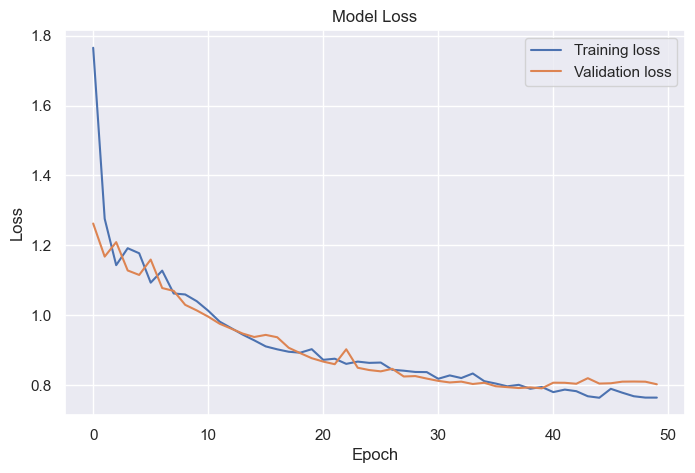

In [77]:
plot_history(cnn_hist)

In [78]:
# DNN Panic Attack
dnn, best_param_dnn, y_pred_dnn, dnn_accuracy, dnn_hist = dnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\dnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4264 - loss: 0.9630 - val_accuracy: 0.5185 - val_loss: 0.7746
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4650 - loss: 0.7752 - val_accuracy: 0.4815 - val_loss: 0.7405
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4790 - loss: 0.7377 - val_accuracy: 0.5185 - val_loss: 0.7347
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5685 - loss: 0.7319 - val_accuracy: 0.4815 - val_loss: 0.7416
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4930 - loss: 0.7386 - val_accuracy: 0.4815 - val_loss: 0.7440
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5115 - loss: 0.7317 - val_accuracy: 0.5185 - val_loss: 0.7424
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5265 - loss: 0.7381 - val_accuracy: 0.5185 - val_loss: 0.7359
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 

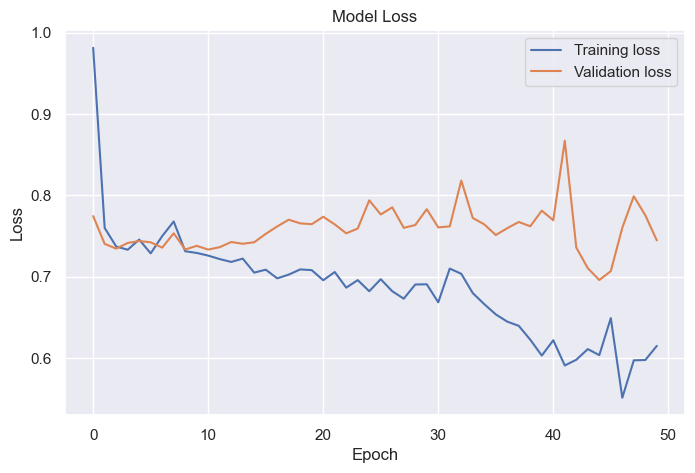

In [79]:
plot_history(dnn_hist)

In [80]:
# RNN Panic Attack
rnn, best_param_rnn, y_pred_rnn, rnn_accuracy, rnn_hist = rnn_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\rnn_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4953 - loss: 1.0654 - val_accuracy: 0.5185 - val_loss: 0.9009
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5389 - loss: 0.9244 - val_accuracy: 0.4815 - val_loss: 0.9294
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5278 - loss: 0.8897 - val_accuracy: 0.4444 - val_loss: 0.9776
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5987 - loss: 0.8727 - val_accuracy: 0.4815 - val_loss: 1.0175
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6452 - loss: 0.8677 - val_accuracy: 0.4074 - val_loss: 1.0035
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5512 - loss: 0.8691 - val_accuracy: 0.4815 - val_loss: 0.9236
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6267 - loss: 0.8574 - val_accuracy: 0.5185 - val_loss: 0.9010
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 

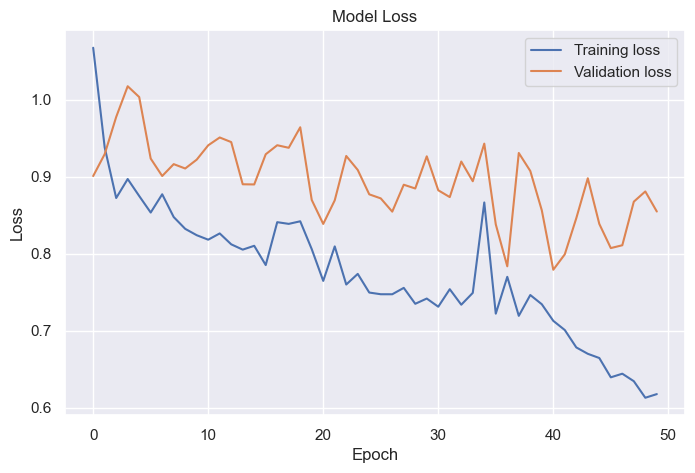

In [81]:
plot_history(rnn_hist)

In [82]:
# MLP Panic Attack
mlp, best_param_mlp, y_pred_mlp, mlp_accuracy, mlp_hist = mlp_classifier_hp(X_train, X_test, X_valid, y_train, y_test, y_valid)

Reloading Tuner from dir\mlp_hyperparameter_tuning\tuner0.json
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4751 - loss: 0.9330 - val_accuracy: 0.4815 - val_loss: 0.8029
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5639 - loss: 0.7535 - val_accuracy: 0.4074 - val_loss: 0.7974
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5886 - loss: 0.6645 - val_accuracy: 0.4815 - val_loss: 0.8072
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6033 - loss: 0.7139 - val_accuracy: 0.5185 - val_loss: 0.8425
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6322 - loss: 0.7056 - val_accuracy: 0.4444 - val_loss: 0.8055
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6228 - loss: 0.6665 - val_accuracy: 0.2963 - val_loss: 0.7845
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6121 - loss: 0.6561 - val_accuracy: 0.3704 - val_loss: 0.7898
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0

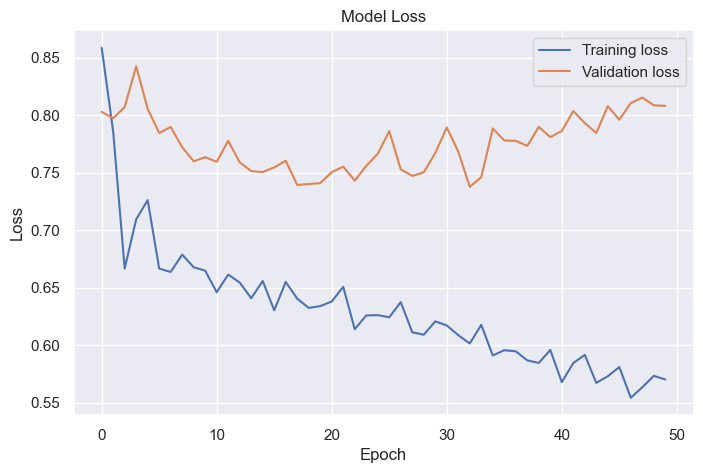

In [83]:
plot_history(mlp_hist)

### Ensemble Learning

In [84]:
# Random Forest Panic Attack
rf, best_param_rf, y_pred_rf, rf_accuracy = hyperparameter_tuning('rf', param_grid_rf, X_train, y_train, X_test, y_test, verbose=0)

In [85]:
# Xgboost Panic Attack
xgb, best_param_xgb, y_pred_xgb, xgb_accuracy = hyperparameter_tuning('xgb', param_grid_xgb, X_train, y_train, X_test, y_test, verbose=0)

In [86]:
# Catboost Panic Attack
cat, best_param_cat, y_pred_cat, cat_accuracy = hyperparameter_tuning('cat', param_grid_cat, X_train, y_train, X_test, y_test, verbose=0)

0:	learn: 0.6922484	total: 899us	remaining: 44.1ms
1:	learn: 0.6913704	total: 2.01ms	remaining: 48.3ms
2:	learn: 0.6908232	total: 2.64ms	remaining: 41.4ms
3:	learn: 0.6899320	total: 3.37ms	remaining: 38.8ms
4:	learn: 0.6894824	total: 4.09ms	remaining: 36.9ms
5:	learn: 0.6890744	total: 4.62ms	remaining: 33.9ms
6:	learn: 0.6883875	total: 5.24ms	remaining: 32.2ms
7:	learn: 0.6876591	total: 5.91ms	remaining: 31ms
8:	learn: 0.6867831	total: 6.63ms	remaining: 30.2ms
9:	learn: 0.6860678	total: 7.53ms	remaining: 30.1ms
10:	learn: 0.6856072	total: 8.19ms	remaining: 29ms
11:	learn: 0.6849213	total: 9.03ms	remaining: 28.6ms
12:	learn: 0.6843163	total: 9.79ms	remaining: 27.9ms
13:	learn: 0.6833802	total: 10.5ms	remaining: 26.9ms
14:	learn: 0.6824803	total: 11.2ms	remaining: 26.2ms
15:	learn: 0.6820137	total: 11.9ms	remaining: 25.3ms
16:	learn: 0.6814197	total: 12.7ms	remaining: 24.7ms
17:	learn: 0.6811681	total: 13.1ms	remaining: 23.3ms
18:	learn: 0.6806141	total: 13.5ms	remaining: 22ms
19:	learn:

In [87]:
# Soft Voting Panic Attack
sv, best_param_sv, y_pred_sv, sv_accuracy = hyperparameter_tuning('vot', param_grid_sv, X_train, y_train, X_test, y_test, verbose=0)

Learning rate set to 0.003523
0:	learn: 0.6919115	total: 1.26ms	remaining: 1.26s
1:	learn: 0.6906210	total: 2.82ms	remaining: 1.41s
2:	learn: 0.6898135	total: 4.35ms	remaining: 1.45s
3:	learn: 0.6890154	total: 5.68ms	remaining: 1.41s
4:	learn: 0.6880135	total: 7.03ms	remaining: 1.4s
5:	learn: 0.6872240	total: 8.31ms	remaining: 1.38s
6:	learn: 0.6862927	total: 9.84ms	remaining: 1.4s
7:	learn: 0.6851395	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6842185	total: 12.5ms	remaining: 1.37s
9:	learn: 0.6831516	total: 13.7ms	remaining: 1.36s
10:	learn: 0.6822525	total: 15ms	remaining: 1.35s
11:	learn: 0.6813899	total: 16.3ms	remaining: 1.34s
12:	learn: 0.6803998	total: 17.5ms	remaining: 1.33s
13:	learn: 0.6792634	total: 18.7ms	remaining: 1.32s
14:	learn: 0.6779623	total: 20ms	remaining: 1.31s
15:	learn: 0.6769376	total: 21.3ms	remaining: 1.31s
16:	learn: 0.6757247	total: 22.7ms	remaining: 1.31s
17:	learn: 0.6748037	total: 24ms	remaining: 1.31s
18:	learn: 0.6740610	total: 25.2ms	remaining: 1.3s
1

### Store Results

In [88]:
# Store results to dictionaries Panic_Attack
predictions[1]['Panic_Attack'].append(('CNN', cnn, y_pred_cnn, y_test, cnn_accuracy, best_param_cnn, cnn_hist))
predictions[1]['Panic_Attack'].append(('DNN', dnn, y_pred_dnn, y_test, dnn_accuracy, best_param_dnn, dnn_hist))
predictions[1]['Panic_Attack'].append(('RNN', rnn, y_pred_rnn, y_test, rnn_accuracy, best_param_rnn, rnn_hist))
predictions[1]['Panic_Attack'].append(('MLP', mlp, y_pred_mlp, y_test, mlp_accuracy, best_param_mlp, mlp_hist))
predictions[1]['Panic_Attack'].append(('RF', rf, y_pred_rf, y_test, rf_accuracy, best_param_rf))
predictions[1]['Panic_Attack'].append(('XGBoost', xgb, y_pred_xgb, y_test, xgb_accuracy, best_param_xgb))
predictions[1]['Panic_Attack'].append(('CatBoost', cat, y_pred_cat, y_test, cat_accuracy, best_param_cat))
predictions[1]['Panic_Attack'].append(('Voting', sv, y_pred_sv, y_test, sv_accuracy, best_param_sv))

In [89]:
for model in predictions[1]['Panic_Attack'][:4]:
    print(model[0])
    print(model[4])
    pprint(model[5].get_config())
    print()

for model in predictions[1]['Panic_Attack'][4:]:
    print(model[0])
    print(model[4])
    pprint(model[5])
    print()

CNN
0.5
{'space': [{'class_name': 'Float',
            'config': {'conditions': [],
                       'default': 1e-05,
                       'max_value': 0.01,
                       'min_value': 1e-05,
                       'name': 'l2_value',
                       'sampling': 'log',
                       'step': None}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'default': None,
                       'max_value': 512,
                       'min_value': 32,
                       'name': 'filters_1',
                       'sampling': 'linear',
                       'step': 32}},
           {'class_name': 'Choice',
            'config': {'conditions': [],
                       'default': 3,
                       'name': 'kernel_size_1',
                       'ordered': True,
                       'values': [3, 5]}},
           {'class_name': 'Int',
            'config': {'conditions': [],
                       'de

### Error Analysis

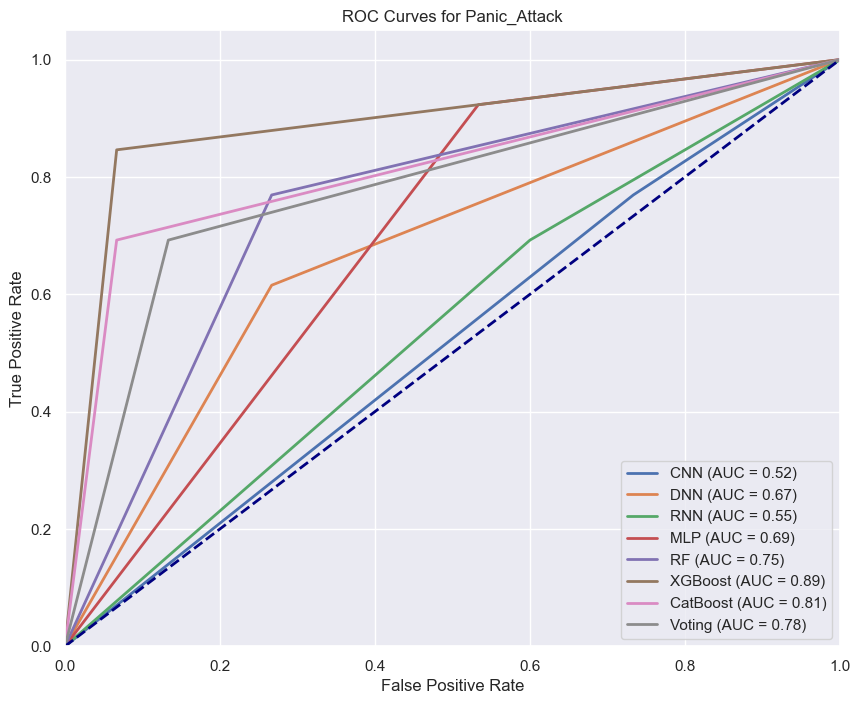

In [90]:
plot_all_roc_curves(predictions, 1, 'Panic_Attack')

# Performance Evaluation

## Accuracy Comparison

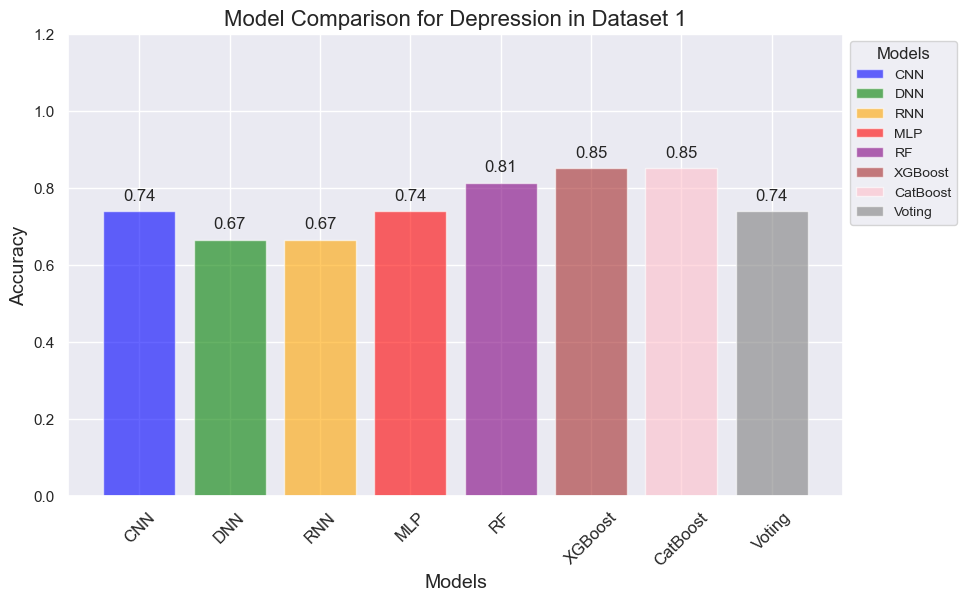

In [91]:
# Example usage for plotting the comparison of Depression models in Dataset 1
plot_comparison(predictions, 1, 'Depression')

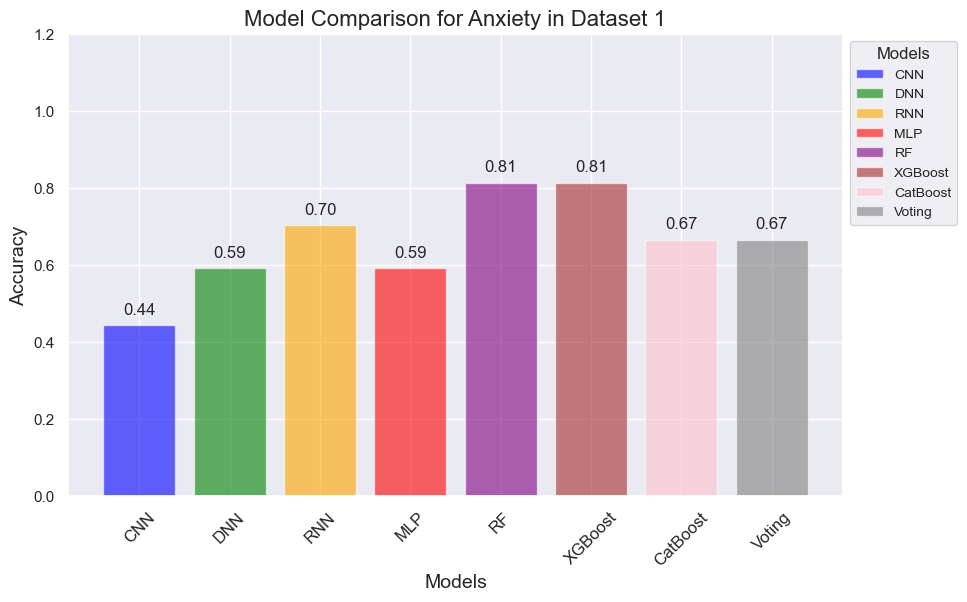

In [92]:
# Plotting the comparison of Anxiety models in Dataset 1
plot_comparison(predictions, 1, 'Anxiety')

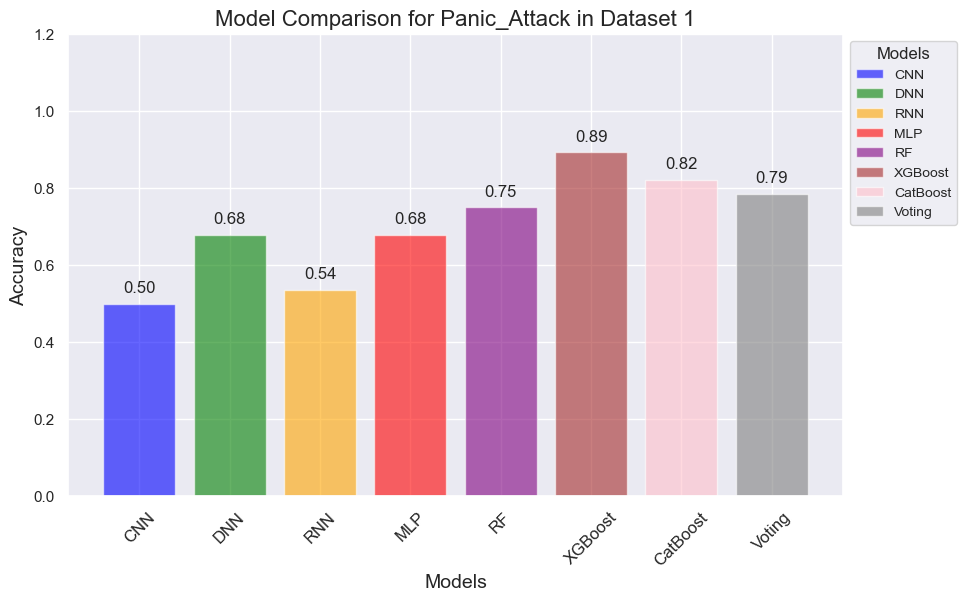

In [93]:
# Plotting the comparison of Panic_Attack models in Dataset 1
plot_comparison(predictions, 1, 'Panic_Attack')

## Confusion Matrix comparison

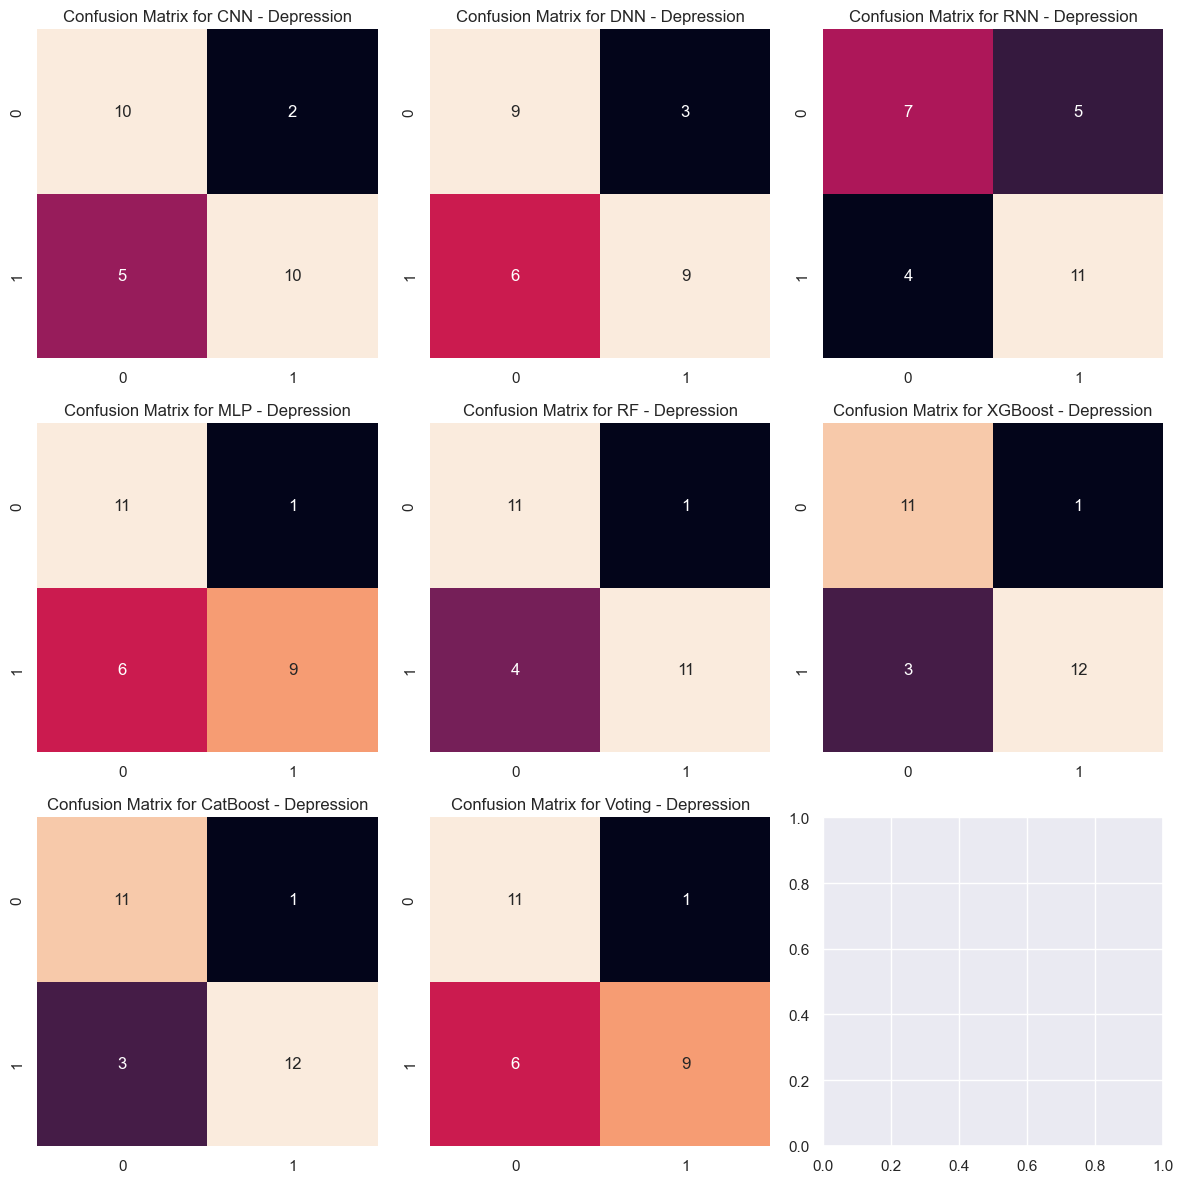

In [94]:
# Plotting confusion matrices of Depression models in Dataset 1
plot_confusion_matrices(predictions, 1, 'Depression')

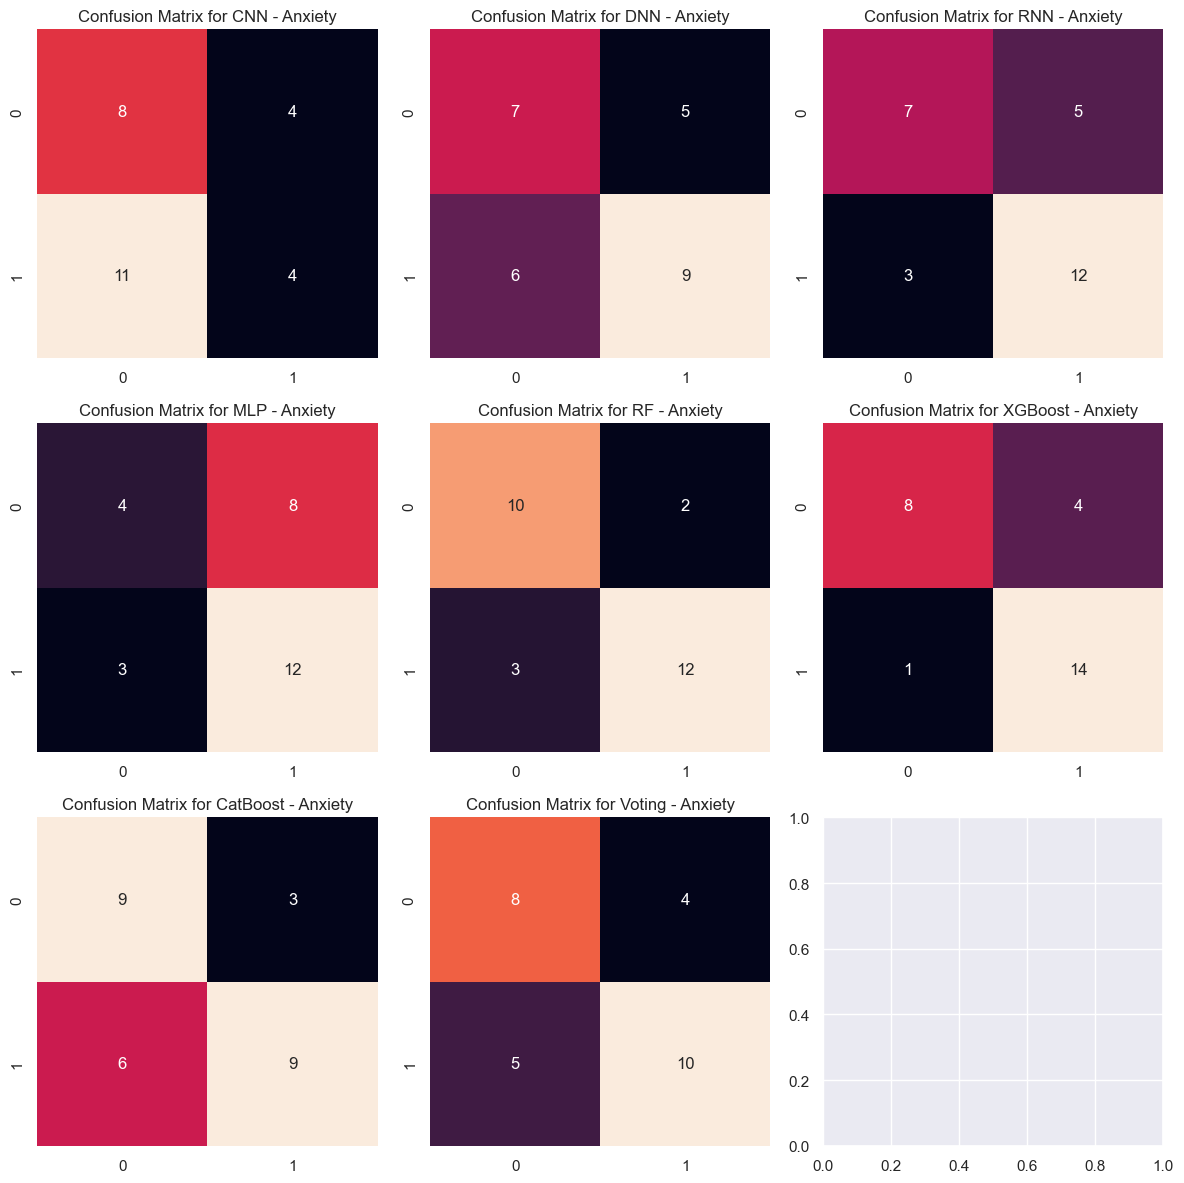

In [95]:
# Plotting confusion matrices of Anxiety models in Dataset 1
plot_confusion_matrices(predictions, 1, 'Anxiety')

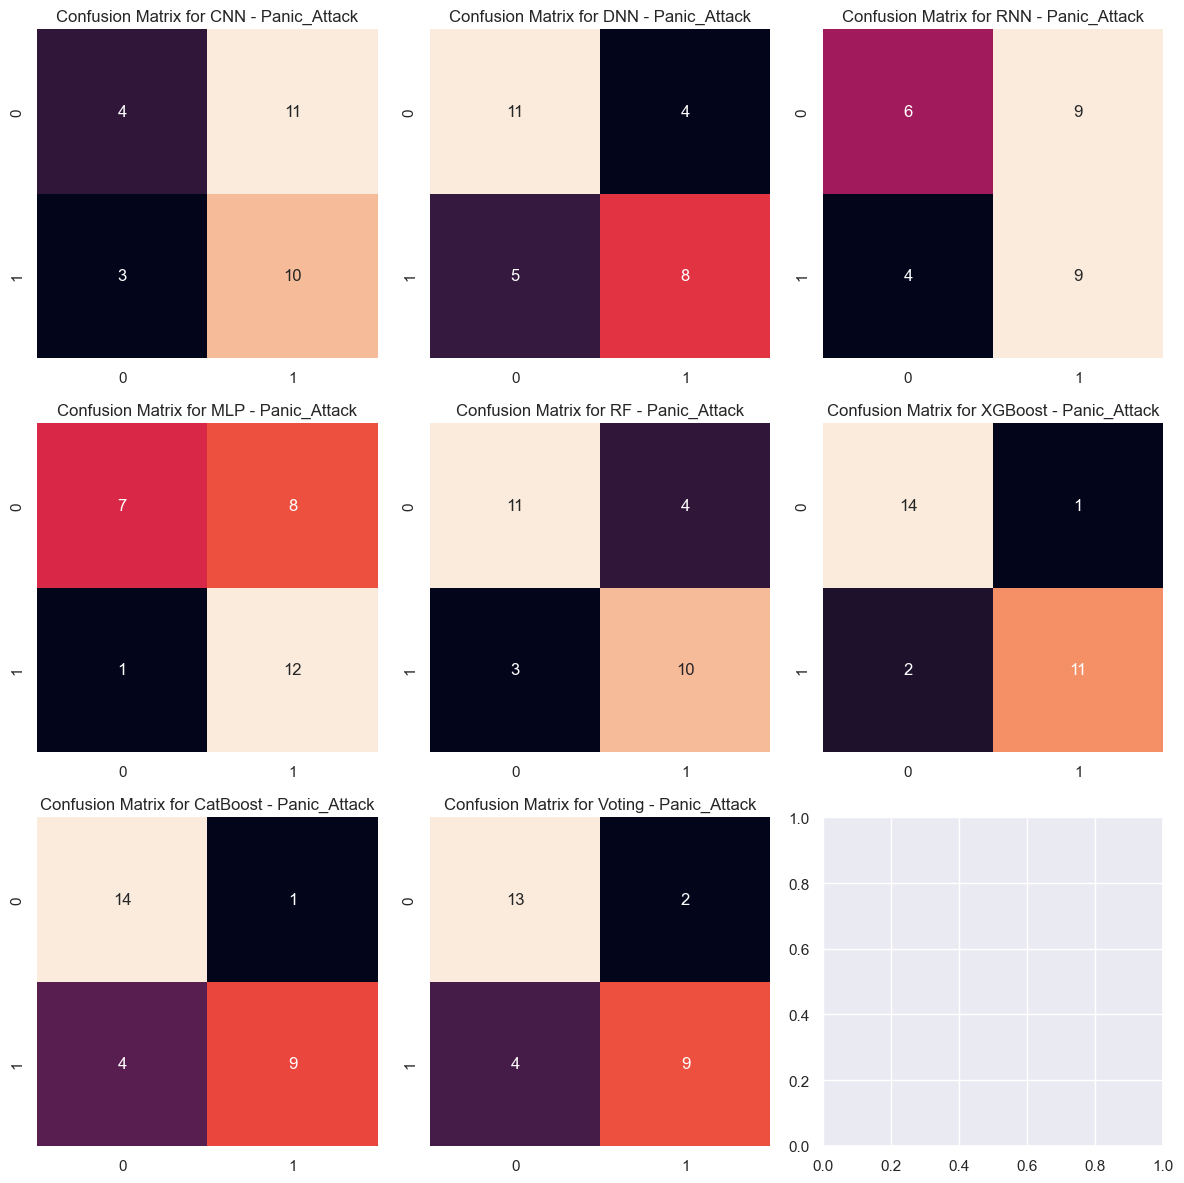

In [96]:
# Plotting confusion matrices of Panic_Attack models in Dataset 1
plot_confusion_matrices(predictions, 1, 'Panic_Attack')

## Feature Importance

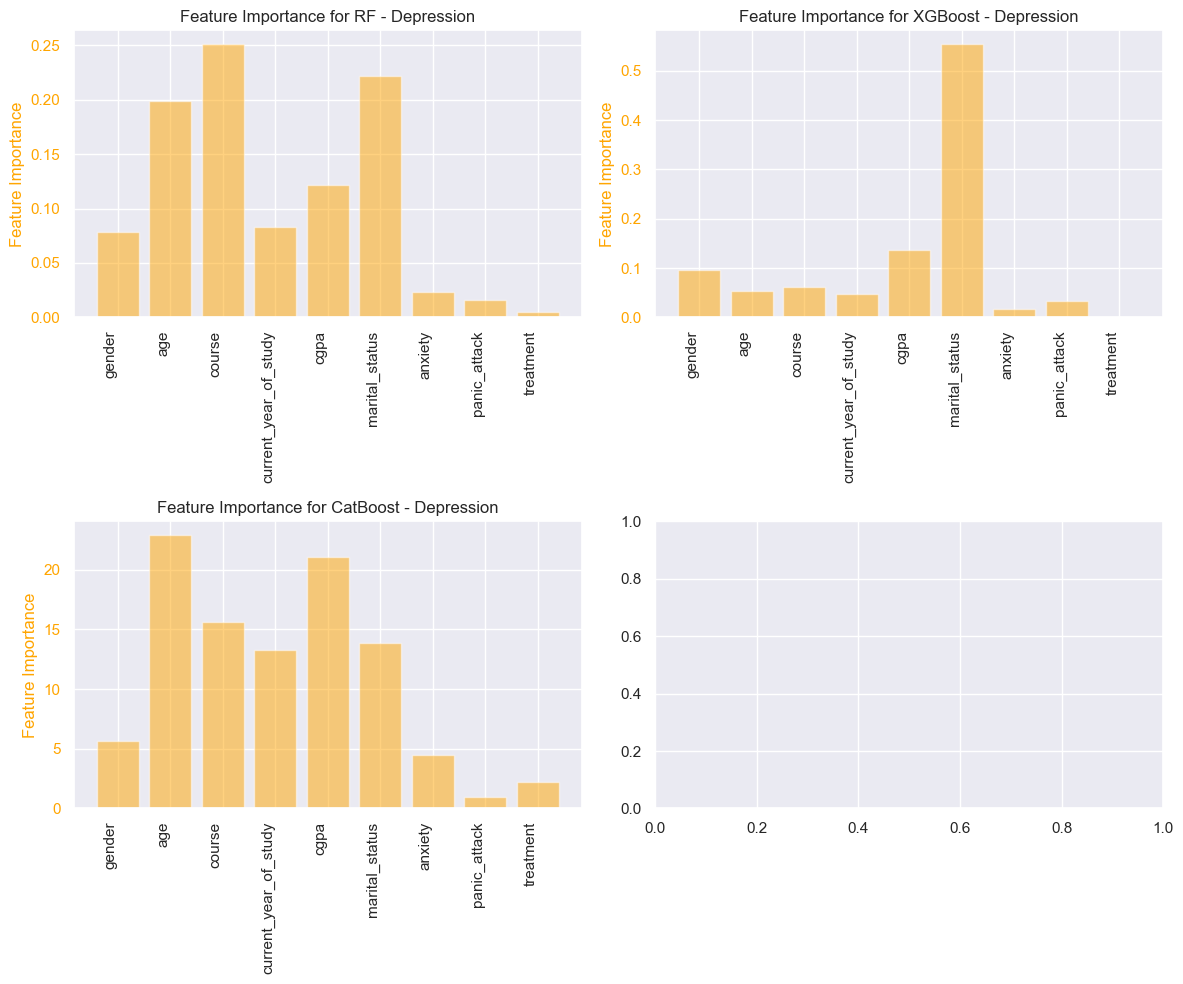

In [97]:
plot_feature_importance(predictions, 1, 'Depression', depression_df .drop('depression', axis=1))

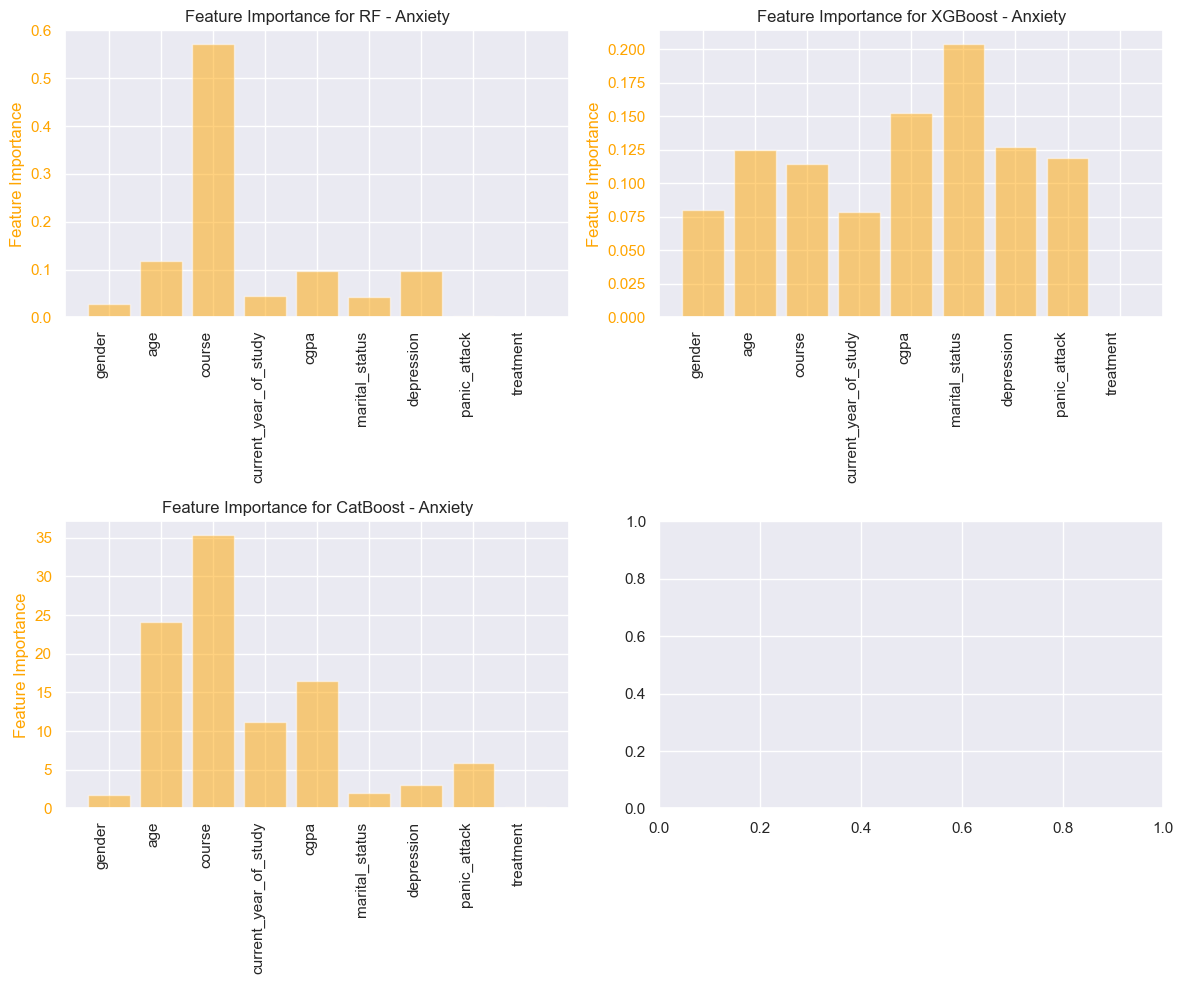

In [98]:
plot_feature_importance(predictions, 1, 'Anxiety', anxiety_df.drop('anxiety', axis=1))

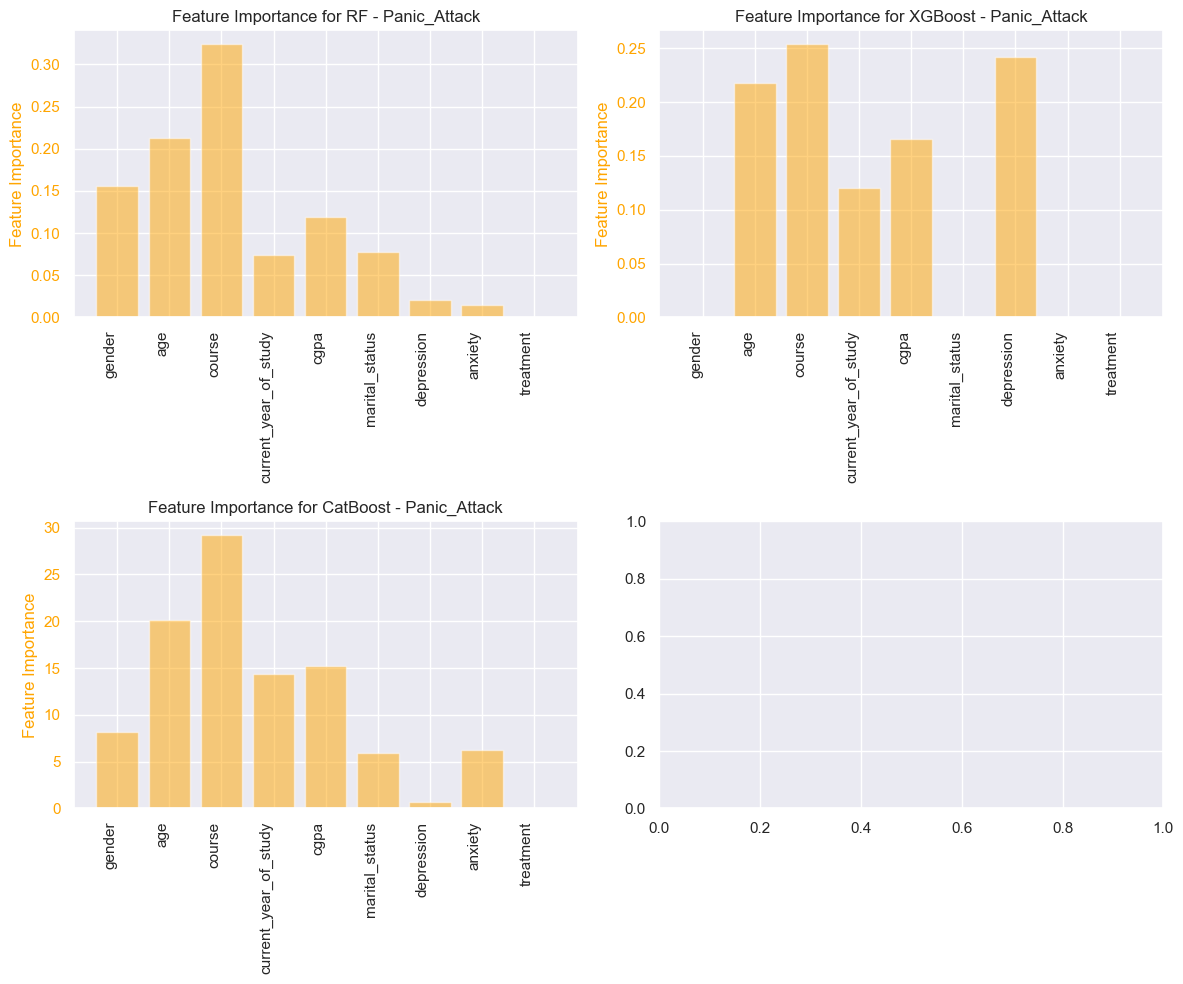

In [99]:
plot_feature_importance(predictions, 1, 'Panic_Attack', pa_df.drop('panic_attack', axis=1))